In [1]:
# Notebook para obtener los resultados que se describen en esta página en kaggle.
#
# https://www.kaggle.com/code/azizozmen/heart-failure-predict-8-classification-techniques
#
# En Anaconda Navigator instalar previamente, con el gestor de entornos, instalar los siguientes paquetes:
# matplotlib, seaborn, scikit-learn, 
# Tiene las modificaciones necesarias para poder instalar las bibliotecas faltantes usando pip3 y pip.
# En la celda 6 se indica el nombre del archivo a procesar, en este caso se toma como referencia el que puso Miguel en la
# carpeta compartida en OneDrive, y es el de kaggle que tiene 12 atributos, se contempla que está en el subdirectorio
# datasets, creado en el mismo nivel donde está almacenado este notebook.

!pip3 install --upgrade setuptools
!pip3 install pyforest xgboost cufflinks colorama

     |████████████████████████████████| 1.2 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0
     |████████████████████████████████| 192.9 MB 124 kB/s eta 0:00:011
     |████████████████████████████████| 81 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.2 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 5.6 MB/s eta 0:00:01
     |███████

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

In [4]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [5]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [6]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [1]:
df0 = pd.read_csv("./kaggle-4-datasets-12-atrib.csv")

<IPython.core.display.Javascript object>

In [9]:
df0

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N    0.000       Up             0  
1      156              N    1.000     Flat             1  
2       98              N    0.000       Up             0  
3      108              Y    1.500     Flat             1  
4      122              N    0.000       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N    1.200     Flat             1  
914    141              N    3.400     Flat             1  
915    115              Y    1.200     Flat             1  
916    174              N    0.000     Flat             1  
917    173              N    0.000       Up             0  

[918 rows x 12 columns]

In [10]:
df = df0

In [11]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N    0.000       Up             0  
1              N    1.000     Flat             1  
2              N    0.000       Up             0  
3              Y    1.500     Flat             1  
4              N    0.000       Up             0

In [12]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N    1.200     Flat             1  
914    141              N    3.400     Flat             1  
915    115              Y    1.200     Flat             1  
916    174              N    0.000     Flat             1  
917    173              N    0.000       Up             0

In [13]:
df.sample(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
521   61   M           ASY        120          282          0         ST   
666   52   M           ATA        128          205          1     Normal   
906   55   F           ATA        132          342          0     Normal   
241   54   M           ASY        200          198          0     Normal   
864   60   M           ASY        145          282          0        LVH   
748   64   M           ASY        120          246          0        LVH   
1     49   F           NAP        160          180          0     Normal   
716   67   M           ASY        120          237          0     Normal   
412   56   M           ASY        125            0          1     Normal   
209   54   M           ASY        125          216          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
521    135              Y    4.000     Down             1  
666    184              N    0.000       Up             0  
906    166              N    1.200       Up             0  
241    142              Y    2.000     Flat             1  
864    142              Y    2.800     Flat             1  
748     96              Y    2.200     Down             1  
1      156              N    1.000     Flat             1  
716     71              N    1.000     Flat             1  
412    103              Y    1.000     Flat             1  
209    140              N    0.000     Flat             1

In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [15]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 918 observation and 12 columns in the dataset


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df.describe().T

count    mean     std    min     25%     50%     75%     max
Age          918.000  53.511   9.433 28.000  47.000  54.000  60.000  77.000
RestingBP    918.000 132.397  18.514  0.000 120.000 130.000 140.000 200.000
Cholesterol  918.000 198.800 109.384  0.000 173.250 223.000 267.000 603.000
FastingBS    918.000   0.233   0.423  0.000   0.000   0.000   0.000   1.000
MaxHR        918.000 136.809  25.460 60.000 120.000 138.000 156.000 202.000
Oldpeak      918.000   0.887   1.067 -2.600   0.000   0.600   1.500   6.200
HeartDisease 918.000   0.553   0.497  0.000   0.000   1.000   1.000   1.000

In [18]:
df.describe(include=object).T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

In [19]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [20]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [21]:
df.duplicated().value_counts()

False    918
dtype: int64

In [22]:
missing (df)

Missing_Number  Missing_Percent
Age                          0            0.000
Sex                          0            0.000
ChestPainType                0            0.000
RestingBP                    0            0.000
Cholesterol                  0            0.000
FastingBS                    0            0.000
RestingECG                   0            0.000
MaxHR                        0            0.000
ExerciseAngina               0            0.000
Oldpeak                      0            0.000
ST_Slope                     0            0.000
HeartDisease                 0            0.000

In [23]:
first_looking("HeartDisease")

column name    :  HeartDisease
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    508
0    410
Name: HeartDisease, dtype: int64


1    508
0    410
Name: HeartDisease, dtype: int64


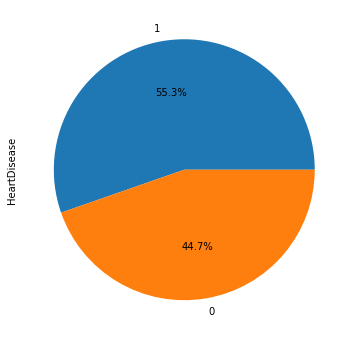

In [24]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6));

In [25]:
y = df['HeartDisease']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Heart Disease)\nPercentage of NOT Heart Disease: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of Heart Disease: % 55.34 --> (508 cases for Heart Disease)
Percentage of NOT Heart Disease: % 44.66 --> (410 cases for NOT Heart Disease)


In [26]:
df['HeartDisease'].describe()

count   918.000
mean      0.553
std       0.497
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: HeartDisease, dtype: float64

In [27]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [28]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [29]:
print( f"Skewness: {df['HeartDisease'].skew()}")

Skewness: -0.21508633825088655


In [30]:
print( f"Kurtosis: {df['HeartDisease'].kurtosis()}")

Kurtosis: -1.9580084425329685


In [31]:
df['HeartDisease'].iplot(kind='hist')

In [32]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [33]:
df[numerical].head().T

0       1       2       3       4
Age          40.000  49.000  37.000  48.000  54.000
RestingBP   140.000 160.000 130.000 138.000 150.000
Cholesterol 289.000 180.000 283.000 214.000 195.000
FastingBS     0.000   0.000   0.000   0.000   0.000
MaxHR       172.000 156.000  98.000 108.000 122.000
Oldpeak       0.000   1.000   0.000   1.500   0.000

In [34]:
df[numerical].describe().T

count    mean     std    min     25%     50%     75%     max
Age         918.000  53.511   9.433 28.000  47.000  54.000  60.000  77.000
RestingBP   918.000 132.397  18.514  0.000 120.000 130.000 140.000 200.000
Cholesterol 918.000 198.800 109.384  0.000 173.250 223.000 267.000 603.000
FastingBS   918.000   0.233   0.423  0.000   0.000   0.000   0.000   1.000
MaxHR       918.000 136.809  25.460 60.000 120.000 138.000 156.000 202.000
Oldpeak     918.000   0.887   1.067 -2.600   0.000   0.600   1.500   6.200

In [35]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [36]:
df[numerical].iplot(kind='hist');

In [37]:
df[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [38]:
for i in numerical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

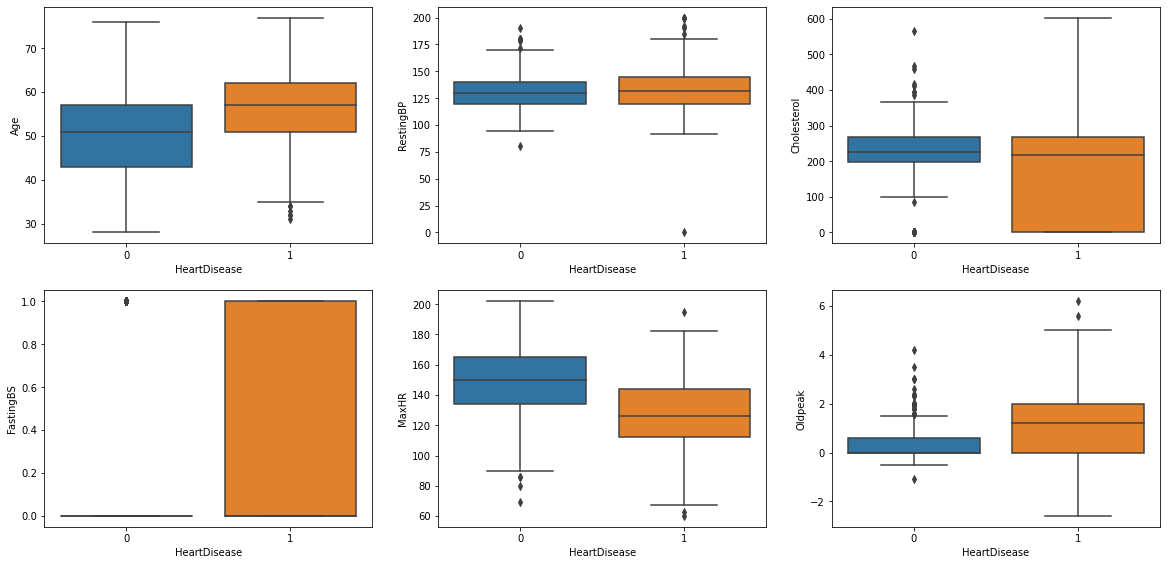

In [39]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

In [40]:
fig = px.scatter_3d(df, 
                    x='RestingBP',
                    y='Age',
                    z='Sex',
                    color='HeartDisease')
fig.show();

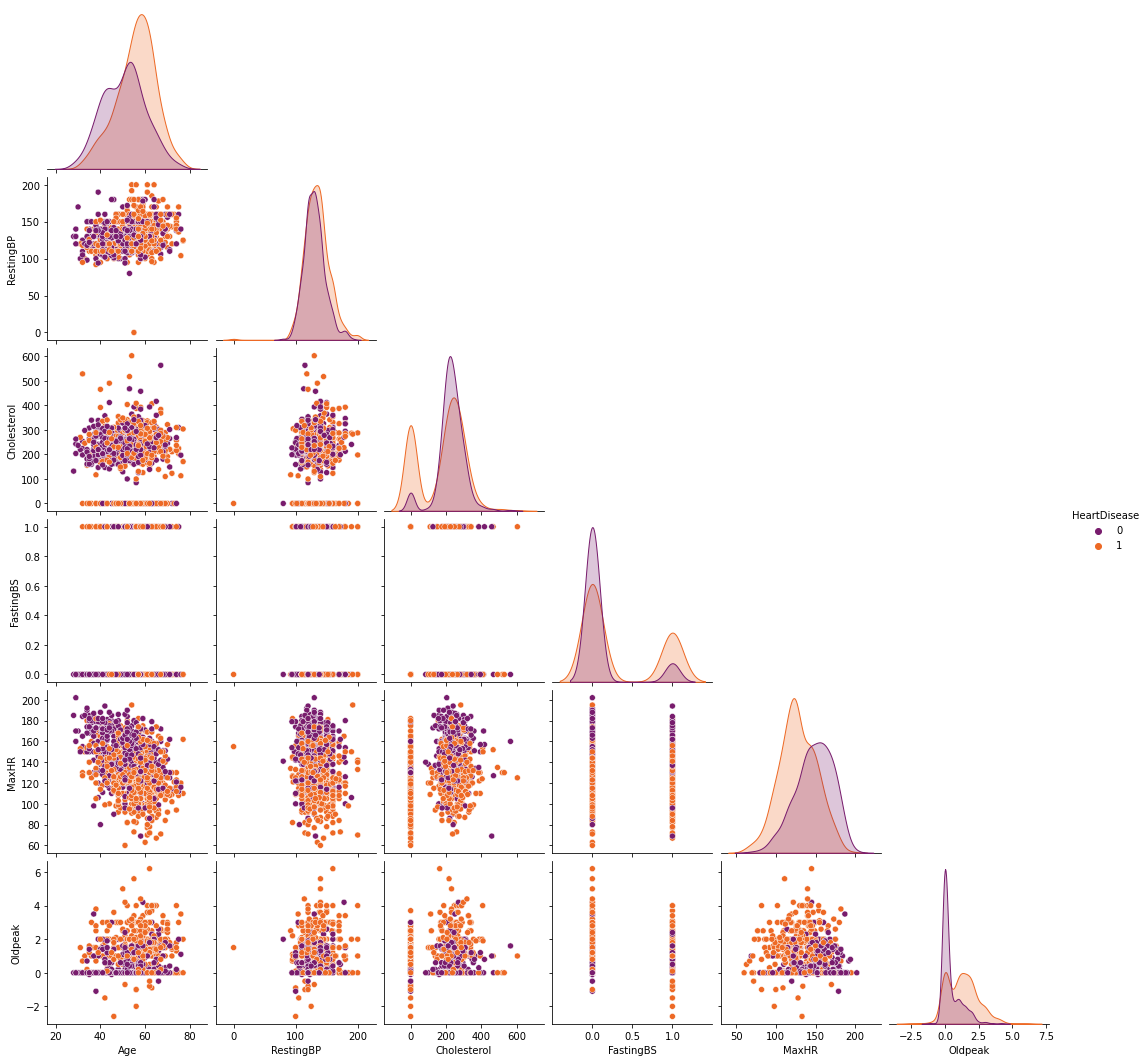

In [41]:
sns.pairplot(df, hue="HeartDisease", palette="inferno", corner=True);

In [42]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264
Oldpeak         1.023
RestingBP       0.180
MaxHR          -0.144
Age            -0.196
HeartDisease   -0.215
Cholesterol    -0.610
dtype: float64

In [43]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

FastingBS      1.264
Oldpeak        1.023
Cholesterol   -0.610
dtype: float64

In [44]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   -0.19593302867569365  means that the distribution is approx.   symmetric 
A skewness value of   0.1798393100516288  means that the distribution is approx.   symmetric 
A skewness value of   -0.6100864307268192  means that the distribution is approx.   highly skewed 
A skewness value of   1.2644841750727027  means that the distribution is approx.   highly skewed 
A skewness value of   -0.14435941846180994  means that the distribution is approx.   symmetric 
A skewness value of   1.0228720218107528  means that the distribution is approx.   highly skewed 
A skewness value of   -0.21508633825088655  means that the distribution is approx.   symmetric 


In [45]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

RestingBP       3.271
Oldpeak         1.203
Cholesterol     0.118
Age            -0.386
FastingBS      -0.402
MaxHR          -0.448
HeartDisease   -1.958
dtype: float64

In [46]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

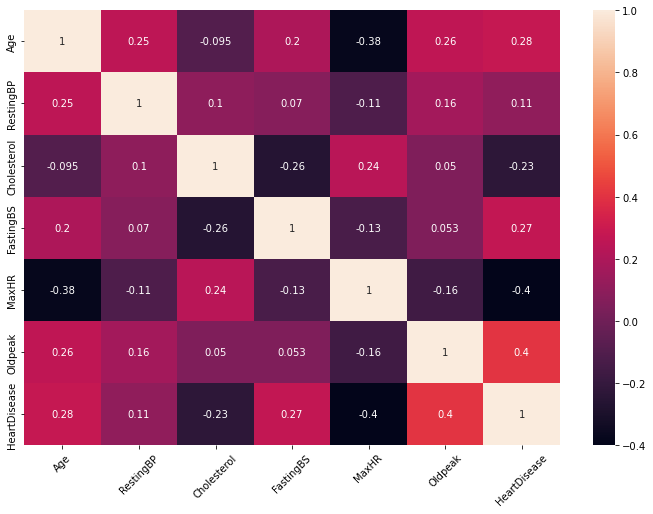

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [48]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For Age and Age, there is NO multicollinearity problem
For Age and RestingBP, there is NO multicollinearity problem
For Age and Cholesterol, there is NO multicollinearity problem
For Age and FastingBS, there is NO multicollinearity problem
For Age and MaxHR, there is NO multicollinearity problem
For Age and Oldpeak, there is NO multicollinearity problem
For Age and HeartDisease, there is NO multicollinearity problem
For RestingBP and Age, there is NO multicollinearity problem
For RestingBP and RestingBP, there is NO multicollinearity problem
For RestingBP and Cholesterol, there is NO multicollinearity problem
For RestingBP and FastingBS, there is NO multicollinearity problem
For RestingBP and MaxHR, there is NO multicollinearity problem
For RestingBP and Oldpeak, there is NO multicollinearity problem
For RestingBP and HeartDisease, there is NO multicollinearity problem
For Cholesterol and Age, there is NO multicollinearity problem
For Cholesterol and RestingBP, there is NO multicolline

In [49]:
df[categorical].head().T

0       1    2       3       4
Sex                  M       F    M       F       M
ChestPainType      ATA     NAP  ATA     ASY     NAP
RestingECG      Normal  Normal   ST  Normal  Normal
ExerciseAngina       N       N    N       Y       N
ST_Slope            Up    Flat   Up    Flat      Up

In [50]:
df[categorical].describe()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

In [51]:
for i in categorical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [52]:
df[categorical].iplot(kind='hist');

In [53]:
df[categorical].iplot(kind='histogram',subplots=True,bins=50)

In [54]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [55]:
df['Sex'].iplot(kind='hist', )

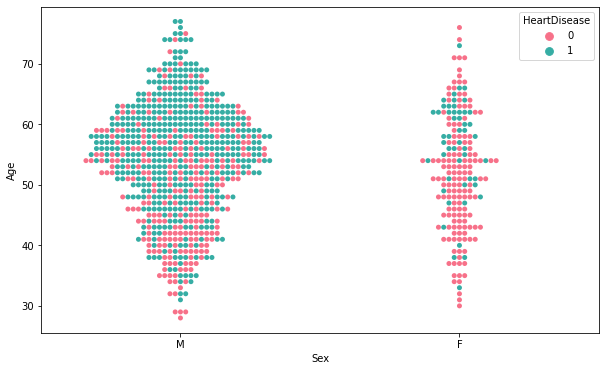

In [56]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df, palette="husl");

In [57]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [58]:
df['ChestPainType'].iplot(kind='hist', )

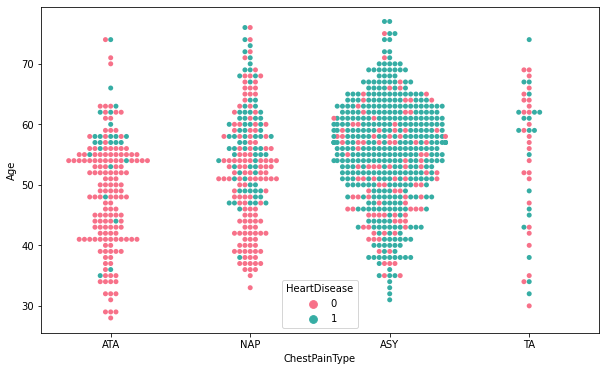

In [59]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=df, palette="husl");

In [60]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [61]:
df['RestingECG'].iplot(kind='hist')

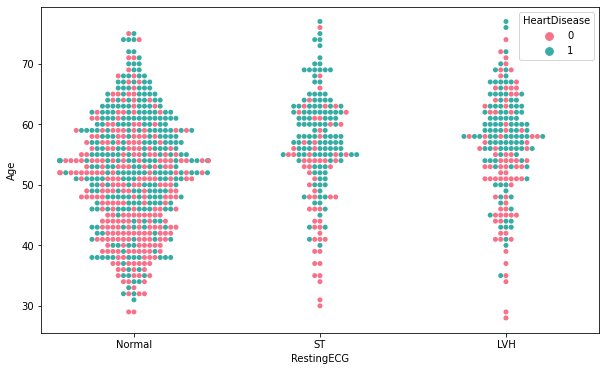

In [62]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=df, palette="husl");

In [63]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [64]:
df['ExerciseAngina'].iplot(kind='hist')

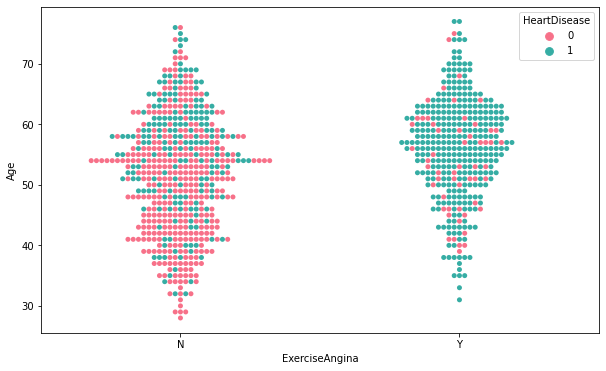

In [65]:
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=df, palette="husl");

In [66]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [67]:
df['ST_Slope'].iplot(kind='hist')

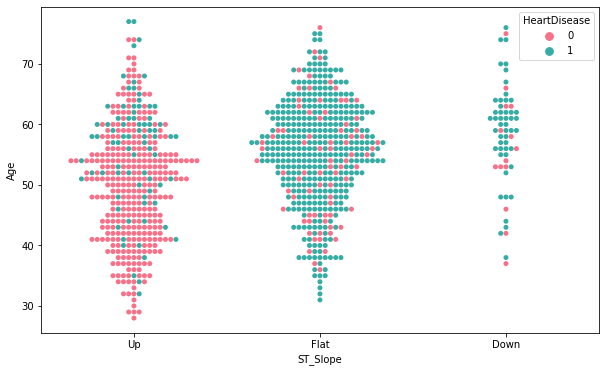

In [68]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=df, palette="husl");

In [69]:
df.shape

(918, 12)

In [70]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N    0.000       Up             0  
1              N    1.000     Flat             1  
2              N    0.000       Up             0  
3              Y    1.500     Flat             1  
4              N    0.000       Up             0

In [71]:
df[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    NAP            ST          Y               Flat          1
     TA             LVH         N               Up            1
                    Normal      N               Down          1
M    ATA            LVH         Y               Flat          1
     TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [72]:
df = pd.get_dummies(df, drop_first=True)

In [73]:
df.shape

(918, 16)

In [74]:
df.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172    0.000             0   
1   49        160          180          0    156    1.000             1   
2   37        130          283          0     98    0.000             0   
3   48        138          214          0    108    1.500             1   
4   54        150          195          0    122    0.000             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [75]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

In [77]:
missing(df)

Missing_Number  Missing_Percent
Age                             0            0.000
RestingBP                       0            0.000
Cholesterol                     0            0.000
FastingBS                       0            0.000
MaxHR                           0            0.000
Oldpeak                         0            0.000
HeartDisease                    0            0.000
Sex_M                           0            0.000
ChestPainType_ATA               0            0.000
ChestPainType_NAP               0            0.000
ChestPainType_TA                0            0.000
RestingECG_Normal               0            0.000
RestingECG_ST                   0            0.000
ExerciseAngina_Y                0            0.000
ST_Slope_Flat                   0            0.000
ST_Slope_Up                     0            0.000

In [78]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [79]:
X_train_scaled = scaler.fit_transform(X_train)

In [80]:
X_test_scaled = scaler.transform(X_test)

In [81]:
# General Insights

def model_first_insight(X_train, y_train, class_weight, solver='liblinear'):
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
   
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=101, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=101)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=101)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    
    return log, svc, decision_tree, random_forest, knn, gb, ab, xgb

In [82]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=101, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=101)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=101)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb}")
  
    return log.score(X_train, y_train), svc.score(X_train, y_train),decision_tree.score(X_train, y_train),random_forest.score(X_train, y_train),knn.score(X_train, y_train),gb.score(X_train, y_train),ab.score(X_train, y_train),xgb.score(X_train, y_train)

In [83]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [84]:
models_accuracy(X_train, y_train)

BASIC ACCURACY


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enabl

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enabl

In [85]:
Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

print("\033[1mBASIC ACCURACY\033[0m")
Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
Scores.loc[0] = Basic

print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
Scores.loc[1] = Scaled

print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
Scores.loc[2] = Balanced

print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
Scores.loc[3] = Scaled_Balanced

Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)

BASIC ACCURACY


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
2) SVC Training Accuracy: SVC(random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enabl

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
2) SVC Training Accuracy: SVC(class_weight='balanced', random_state=101)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)
6) GradiendBoosting Training Accuracy: GradientBoostingClassifier(random_state=101)
7) AdaBoosting Training Accuracy: AdaBoostClassifier(random_state=101)
8) XGBoosting Training Accuracy: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enabl

In [86]:
accuracy_scores = Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                              .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                              .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

accuracy_scores

In [87]:
accuracy_scores

In [88]:
operations = [("scaler", MinMaxScaler()), ("power", PowerTransformer()), ("log", LogisticRegression(random_state=101))]

In [89]:
# Defining the pipeline object for LogisticClassifier

pipe_log_model = Pipeline(steps=operations)

In [90]:
# Another step by step way for defining the pipeline object for LogisticClassifier

# scaler = MinMaxScaler()
# power = PowerTransformer(method='yeo-johnson')
# pipe_model = LogisticRegression(random_state=101)
# pipe_log_model = Pipeline(steps=[('s', scaler),('p', power), ('m', pipe_model)])

In [91]:
pipe_log_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('power', PowerTransformer()),
  ('log', LogisticRegression(random_state=101))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'power': PowerTransformer(),
 'log': LogisticRegression(random_state=101),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'power__copy': True,
 'power__method': 'yeo-johnson',
 'power__standardize': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 101,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [92]:
pipe_log_model.fit(X_train, y_train)
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)

In [93]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



In [94]:
pipe_scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

df_pipe_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.032       0.005          0.795           0.787        0.860    0.822
2      0.038       0.005          0.821           0.822        0.860    0.841
3      0.035       0.005          0.885           0.886        0.907    0.897
4      0.037       0.004          0.833           0.875        0.814    0.843
5      0.033       0.004          0.897           0.889        0.930    0.909
6      0.033       0.004          0.821           0.822        0.860    0.841
7      0.031       0.004          0.872           0.851        0.930    0.889
8      0.032       0.005          0.833           0.826        0.884    0.854
9      0.035       0.004          0.833           0.878        0.818    0.847
10     0.034       0.004          0.923           0.913        0.955    0.933

In [95]:
df_pipe_scores.mean()[2:]

test_accuracy    0.851
test_precision   0.855
test_recall      0.882
test_f1          0.868
dtype: float64

In [96]:
# evaluate the pipeline

# from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(pipe_log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %85.75, Results Standard Deviation : 3.228


In [97]:
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.858 (0.032)


In [98]:
accuracy_scores

[[51 11]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.862     0.877
Precision      0.867     0.864
Recall         0.887     0.921
f1             0.876     0.892

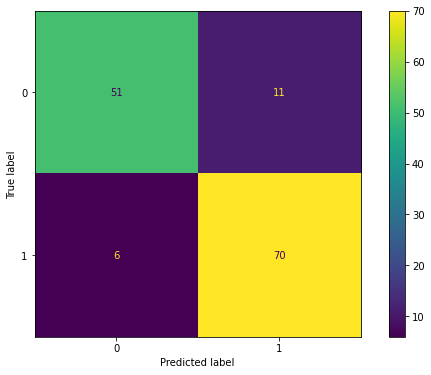

In [99]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [100]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.05076976, 0.94923024],
       [0.04870887, 0.95129113],
       [0.14385456, 0.85614544],
       [0.92875297, 0.07124703],
       [0.71116151, 0.28883849],
       [0.15237434, 0.84762566],
       [0.15120876, 0.84879124],
       [0.42870686, 0.57129314],
       [0.44449083, 0.55550917],
       [0.81621359, 0.18378641],
       [0.03653746, 0.96346254],
       [0.10809954, 0.89190046],
       [0.10442966, 0.89557034],
       [0.91311669, 0.08688331],
       [0.11643435, 0.88356565],
       [0.06681484, 0.93318516],
       [0.07004074, 0.92995926],
       [0.10902775, 0.89097225],
       [0.34616094, 0.65383906],
       [0.51035142, 0.48964858],
       [0.91816183, 0.08183817],
       [0.01911985, 0.98088015],
       [0.04477097, 0.95522903],
       [0.94102715, 0.05897285],
       [0.17281261, 0.82718739],
       [0.97639215, 0.02360785],
       [0.26934403, 0.73065597],
       [0.22676553, 0.77323447],
       [0.25401111, 0.74598889],
       [0.97038495, 0.02961505],
       [0.

In [101]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
33    41        130          172          0    130    2.000      1   
241   54        200          198          0    142    2.000      1   
439   74        138            0          0    116    0.200      1   
610   54        127          333          1    154    0.000      0   
781   50        110          254          0    159    0.000      0   
518   48        102            0          1    110    1.000      1   
807   54        108          309          0    156    0.000      1   
45    59        130          318          0    120    1.000      1   
794   50        129          196          0    163    0.000      1   
523   59        124          160          0    117    1.000      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
33                   0                  0                 0   
241                  0                  0                 0   
439                  0                  1                 0   
610                  0                  0                 0   
781                  0                  0                 0   
518                  0                  1                 0   
807                  1                  0                 0   
45                   0                  1                 0   
794                  0                  1                 0   
523                  0                  0                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
33                   0              1                 0              1   
241                  1              0                 1              1   
439                  1              0                 0              0   
610                  0              1                 0              1   
781                  0              0                 0              0   
518                  0              1                 1              0   
807                  1              0                 0              0   
45                   1              0                 1              1   
794                  1              0                 0              0   
523                  1              0                 1              1   

     ST_Slope_Up  HeartDisease  pred  pred_proba  
33             0             1     1       0.848  
241            0             1     1       0.953  
439            1             0     0       0.228  
610            0             1     1       0.700  
781            1             0     0       0.103  
518            0             1     1       0.813  
807            1             0     0       0.059  
45             0             0     1       0.731  
794            1             0     0       0.082  
523            0             1     1       0.951

In [102]:
log_xvalid_model = LogisticRegression()

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                          'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))

log_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.010       0.003          0.808           0.792        0.884    0.835
2      0.008       0.003          0.821           0.822        0.860    0.841
3      0.009       0.003          0.872           0.884        0.884    0.884
4      0.009       0.002          0.833           0.875        0.814    0.843
5      0.010       0.003          0.910           0.891        0.953    0.921
6      0.008       0.003          0.833           0.841        0.860    0.851
7      0.009       0.003          0.872           0.851        0.930    0.889
8      0.009       0.003          0.846           0.830        0.907    0.867
9      0.008       0.003          0.833           0.897        0.795    0.843
10     0.009       0.003          0.936           0.915        0.977    0.945

In [103]:
log_xvalid_model_scores.mean()[2:]

test_accuracy    0.856
test_precision   0.860
test_recall      0.887
test_f1          0.872
dtype: float64

In [104]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [105]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [106]:
LR_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [107]:
print(colored('\033[1mBest Parameters of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for LR Model: {'C': 1.0, 'l1_ratio': 0.47368421052631576, 'penalty': 'elasticnet'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: LogisticRegression(class_weight='balanced', l1_ratio=0.47368421052631576,
                   max_iter=5000, penalty='elasticnet', solver='saga')


[[53  9]
 [ 8 68]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.88      0.89      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.88       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.868     0.877
Precision      0.885     0.883
Recall         0.875     0.895
f1             0.880     0.889

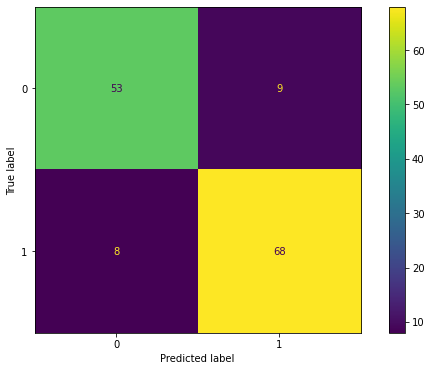

In [108]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

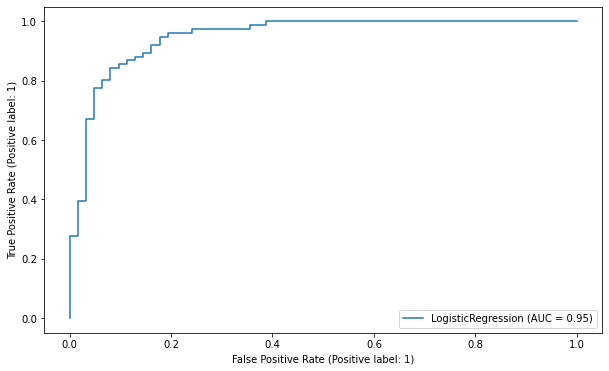

In [109]:
plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

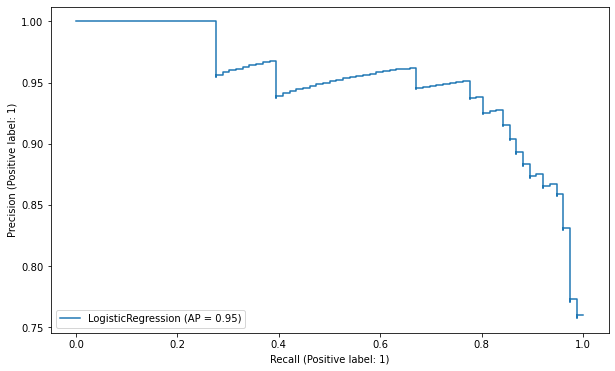

In [110]:
plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

In [111]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [112]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4841659373540681

In [113]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

fp_rate  tp_rate  thresholds
0     0.000    0.000       1.982
1     0.000    0.013       0.982
2     0.000    0.276       0.949
3     0.016    0.276       0.947
4     0.016    0.395       0.915
5     0.032    0.395       0.909
6     0.032    0.671       0.825
7     0.048    0.671       0.823
8     0.048    0.776       0.767
9     0.065    0.776       0.767
10    0.065    0.803       0.736
11    0.081    0.803       0.731
12    0.081    0.842       0.694
13    0.097    0.842       0.687
14    0.097    0.855       0.686
15    0.113    0.855       0.654
16    0.113    0.868       0.647
17    0.129    0.868       0.629
18    0.129    0.882       0.591
19    0.145    0.882       0.571
20    0.145    0.895       0.556
21    0.161    0.895       0.534
22    0.161    0.921       0.530
23    0.177    0.921       0.502
24    0.177    0.947       0.484
25    0.194    0.947       0.396
26    0.194    0.961       0.394
27    0.242    0.961       0.298
28    0.242    0.974       0.296
29    0.355    0.974       0.186
30    0.355    0.987       0.185
31    0.387    0.987       0.132
32    0.387    1.000       0.121
33    1.000    1.000       0.020

In [114]:
df_roc_curve.iloc[optimal_idx]

fp_rate      0.177
tp_rate      0.947
thresholds   0.484
Name: 24, dtype: float64

In [115]:
accuracy_scores

[[54  8]
 [ 7 69]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        62
           1       0.90      0.91      0.90        76

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.883     0.891
Precision      0.881     0.896
Recall         0.912     0.908
f1             0.896     0.902

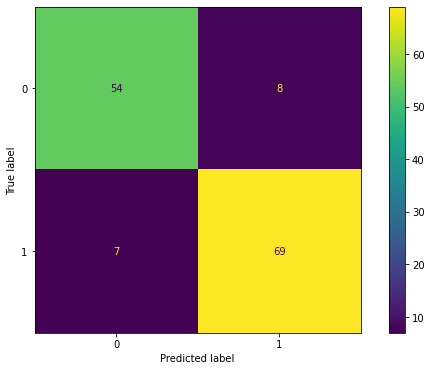

In [116]:
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[295  53]
 [ 38 394]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       348
           1       0.88      0.91      0.90       432

    accuracy                           0.88       780
   macro avg       0.88      0.88      0.88       780
weighted avg       0.88      0.88      0.88       780

--------------------------------------------------------


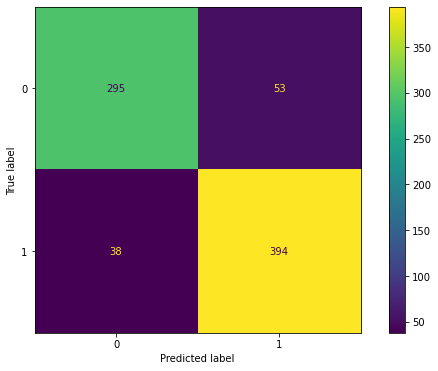

In [117]:
y_train_pred = SVM_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_train_scaled, y_train);

     |████████████████████████████████| 274 kB 1.4 MB/s eta 0:00:01


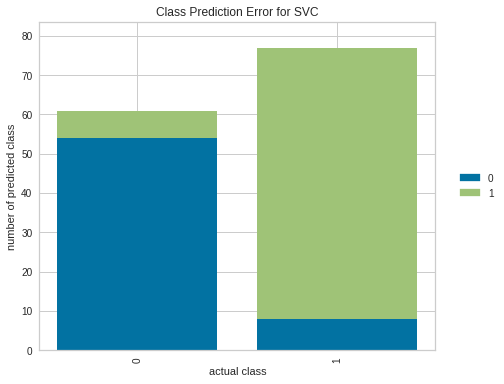

In [118]:
!pip install yellowbrick
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [119]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.009       0.003          0.833           0.800        0.930    0.860
2      0.008       0.003          0.821           0.809        0.884    0.844
3      0.008       0.003          0.859           0.881        0.860    0.871
4      0.008       0.003          0.821           0.837        0.837    0.837
5      0.008       0.003          0.923           0.951        0.907    0.929
6      0.008       0.003          0.795           0.800        0.837    0.818
7      0.009       0.003          0.885           0.854        0.953    0.901
8      0.008       0.003          0.859           0.848        0.907    0.876
9      0.008       0.003          0.833           0.897        0.795    0.843
10     0.008       0.003          0.923           0.913        0.955    0.933

In [120]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy    0.855
test_precision   0.859
test_recall      0.887
test_f1          0.871
dtype: float64

In [121]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [122]:
SVM_grid_model = SVC(random_state=42)

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [123]:
SVM_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.801 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.846 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.801 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.853 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.878 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.853 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.872 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.769 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [124]:
print(colored('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(SVM_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', 'blue'), colored(SVM_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for SVM Model: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for SVM Model: SVC(C=100, gamma=0.01, random_state=42)


[[54  8]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        62
           1       0.90      0.92      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.873     0.899
Precision      0.874     0.897
Recall         0.900     0.921
f1             0.887     0.909

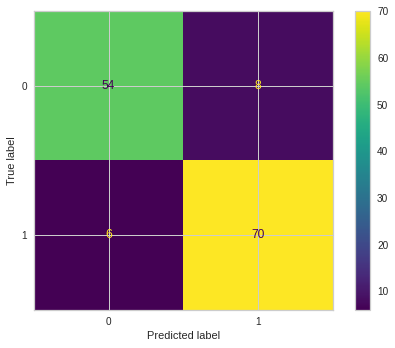

In [125]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

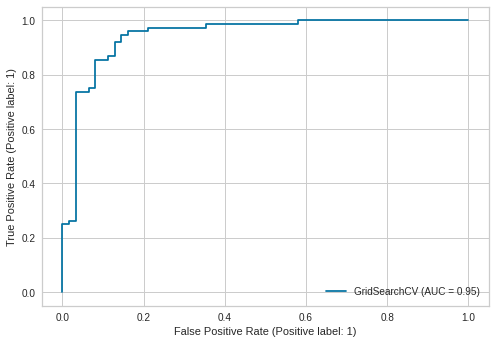

In [126]:
plot_roc_curve(SVM_grid_model, X_test_scaled, y_test);

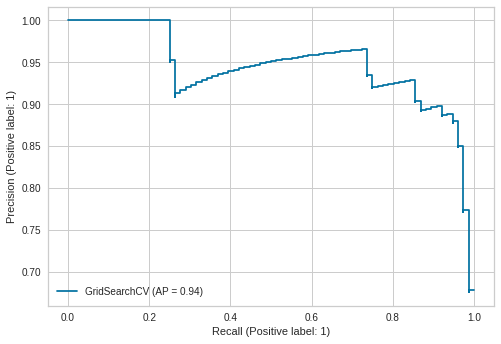

In [127]:
plot_precision_recall_curve(SVM_grid_model, X_test_scaled, y_test);

In [128]:
accuracy_scores

[[43 19]
 [18 58]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        62
           1       0.75      0.76      0.76        76

    accuracy                           0.73       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.73      0.73      0.73       138

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.732
Precision      1.000     0.753
Recall         1.000     0.763
f1             1.000     0.758

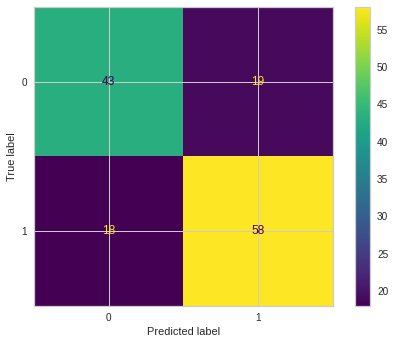

In [129]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

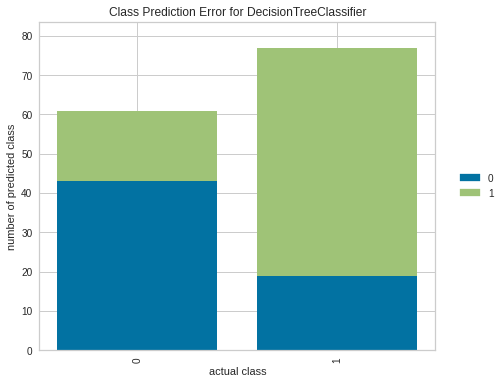

In [130]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [131]:
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.002       0.003          0.769           0.821        0.744    0.780
2      0.002       0.002          0.782           0.783        0.837    0.809
3      0.002       0.002          0.756           0.853        0.674    0.753
4      0.002       0.002          0.667           0.673        0.767    0.717
5      0.002       0.002          0.769           0.879        0.674    0.763
6      0.002       0.002          0.718           0.744        0.744    0.744
7      0.002       0.002          0.795           0.800        0.837    0.818
8      0.002       0.002          0.782           0.795        0.814    0.805
9      0.002       0.002          0.769           0.861        0.705    0.775
10     0.002       0.002          0.885           0.889        0.909    0.899

In [132]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy    0.769
test_precision   0.810
test_recall      0.771
test_f1          0.786
dtype: float64

In [133]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [134]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=rand

In [135]:
print(colored('\033[1mBest Parameters of GridSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Decision Tree Model: {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Decision Tree Model: DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_features=7,
                       min_samples_leaf=3, min_samples_split=9, random_state=42,
                       splitter='random')


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=rand

train_set  test_set
Accuracy       0.879     0.848
Precision      0.879     0.840
Recall         0.907     0.895
f1             0.893     0.866

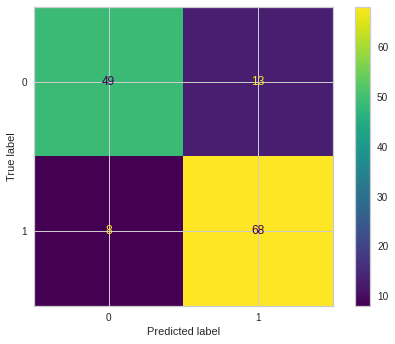

In [136]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [137]:
DT_model.feature_importances_

array([0.06666223, 0.0826702 , 0.13219174, 0.02816061, 0.12614699,
       0.06645499, 0.02719402, 0.00839559, 0.02680743, 0.        ,
       0.01774024, 0.00424299, 0.03420438, 0.01015882, 0.36896978])

In [138]:
DT_feature_imp = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
DT_feature_imp

Feature Importance
ChestPainType_TA                0.000
RestingECG_ST                   0.004
ChestPainType_ATA               0.008
ST_Slope_Flat                   0.010
RestingECG_Normal               0.018
ChestPainType_NAP               0.027
Sex_M                           0.027
FastingBS                       0.028
ExerciseAngina_Y                0.034
Oldpeak                         0.066
Age                             0.067
RestingBP                       0.083
MaxHR                           0.126
Cholesterol                     0.132
ST_Slope_Up                     0.369

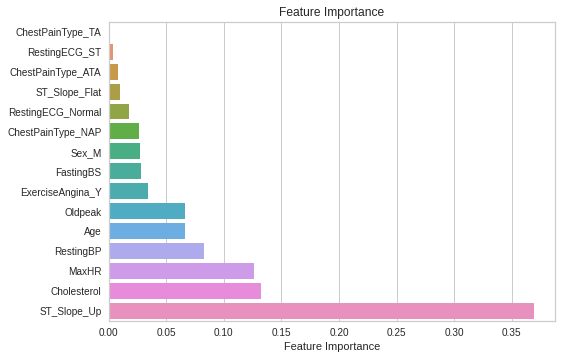

In [139]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [140]:
X1 = X.drop(columns = ["ST_Slope_Up"])
y1 = df["HeartDisease"]

In [141]:
X1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

In [142]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

[[46 10]
 [18 64]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        56
           1       0.86      0.78      0.82        82

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.81      0.80      0.80       138

[[46 10]
 [18 64]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        56
           1       0.86      0.78      0.82        82

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.81      0.80      0.80       138

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.797
Precision      1.000     0.865
Recall         1.000     0.780
f1             1.000     0.821

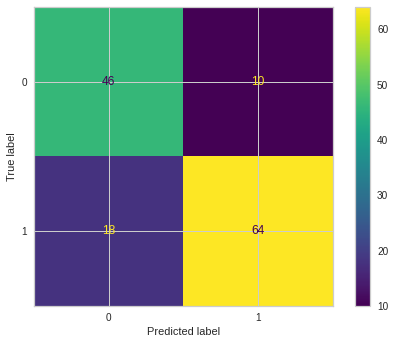

In [143]:
operations = [("scaler", MinMaxScaler()), ("dt", DecisionTreeClassifier(class_weight="balanced", random_state=42))]

DT_pipe_model = Pipeline(steps=operations)
DT_pipe_model.get_params()
DT_pipe_model.fit(X1_train, y1_train)

y1_pred = DT_pipe_model.predict(X1_test)
y1_train_pred = DT_pipe_model.predict(X1_train)

print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

rf_pipe_f1 = f1_score(y1_test, y1_pred)
rf_pipe_acc = accuracy_score(y1_test, y1_pred)
rf_pipe_recall = recall_score(y1_test, y1_pred)
rf_pipe_auc = roc_auc_score(y1_test, y_pred)

print(confusion_matrix(y1_test, y1_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y1_test, y1_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_pipe_model, X1_test, y1_test)

train_val(y1_train, y1_train_pred, y1_test, y1_pred)

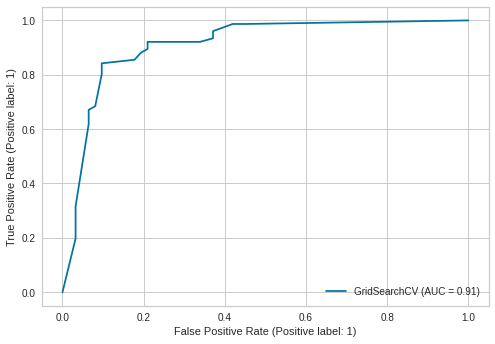

In [144]:
plot_roc_curve(DT_grid_model, X_test_scaled, y_test);

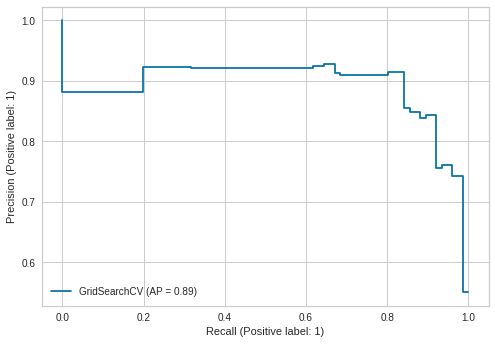

In [145]:
plot_precision_recall_curve(DT_grid_model, X_test_scaled, y_test);

In [146]:
accuracy_scores

[[53  9]
 [ 5 71]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        62
           1       0.89      0.93      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.89      0.90       138
weighted avg       0.90      0.90      0.90       138

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.899
Precision      1.000     0.887
Recall         1.000     0.934
f1             1.000     0.910

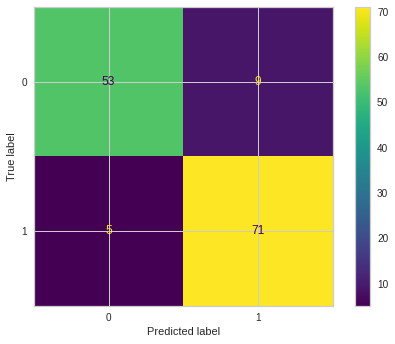

In [147]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

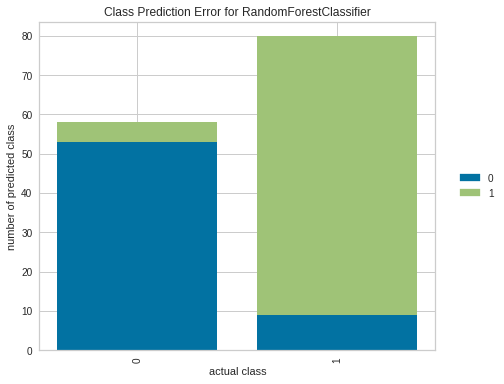

In [148]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [149]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=101)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.112       0.009          0.872           0.851        0.930    0.889
2      0.102       0.009          0.846           0.830        0.907    0.867
3      0.101       0.009          0.910           0.909        0.930    0.920
4      0.099       0.009          0.885           0.886        0.907    0.897
5      0.106       0.009          0.885           0.886        0.907    0.897
6      0.102       0.009          0.846           0.830        0.907    0.867
7      0.102       0.009          0.795           0.776        0.884    0.826
8      0.100       0.009          0.833           0.841        0.860    0.851
9      0.102       0.010          0.782           0.846        0.750    0.795
10     0.114       0.009          0.923           0.913        0.955    0.933

In [150]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy    0.858
test_precision   0.857
test_recall      0.894
test_f1          0.874
dtype: float64

In [151]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [152]:
RF_grid_model = RandomForestClassifier(random_state=101)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)  # Whatch out, fit() can also be used here

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=50; to

In [153]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Random Forest Model: {'max_depth': 5, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(max_depth=5, max_features=3, min_samples_split=8,
                       n_estimators=50, random_state=101)


[[50 12]
 [ 3 73]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        62
           1       0.86      0.96      0.91        76

    accuracy                           0.89       138
   macro avg       0.90      0.88      0.89       138
weighted avg       0.90      0.89      0.89       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.890     0.891
Precision      0.878     0.859
Recall         0.931     0.961
f1             0.903     0.907

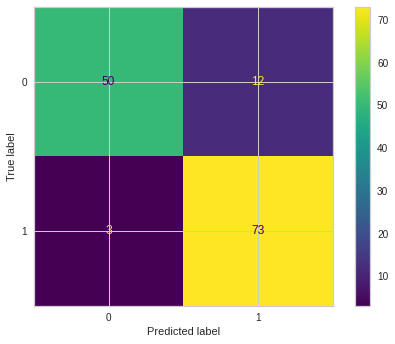

In [154]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [155]:
RF_model.feature_importances_

array([0.08982893, 0.07479496, 0.10764148, 0.02468804, 0.10593903,
       0.12210332, 0.03555794, 0.03176215, 0.02549079, 0.01039822,
       0.01727643, 0.00946221, 0.09193834, 0.10527461, 0.14784354])

In [156]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

Feature Importance
ST_Slope_Up                     0.148
Oldpeak                         0.122
Cholesterol                     0.108
MaxHR                           0.106
ST_Slope_Flat                   0.105
ExerciseAngina_Y                0.092
Age                             0.090
RestingBP                       0.075
Sex_M                           0.036
ChestPainType_ATA               0.032
ChestPainType_NAP               0.025
FastingBS                       0.025
RestingECG_Normal               0.017
ChestPainType_TA                0.010
RestingECG_ST                   0.009

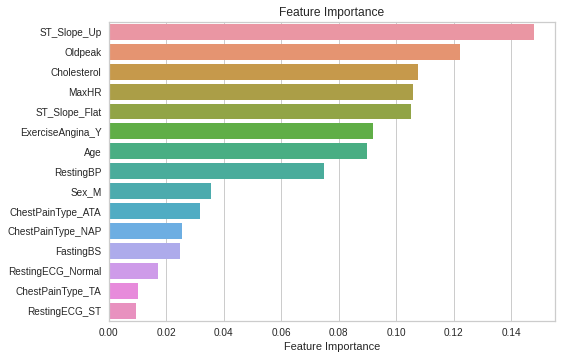

In [157]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

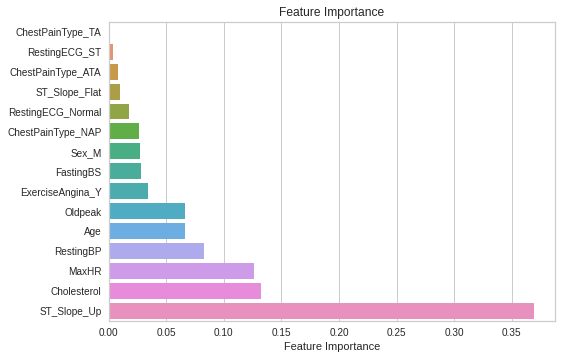

In [158]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

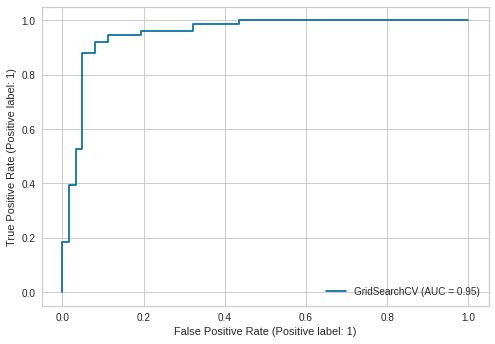

In [159]:
plot_roc_curve(RF_grid_model, X_test_scaled, y_test);

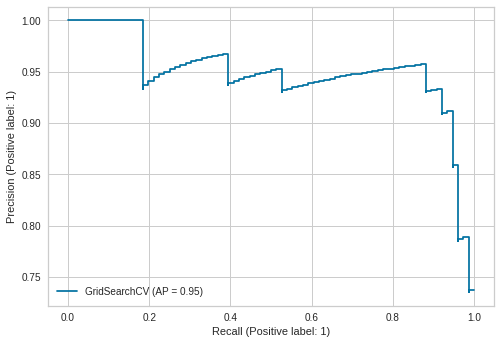

In [160]:
plot_precision_recall_curve(RF_grid_model, X_test_scaled, y_test);

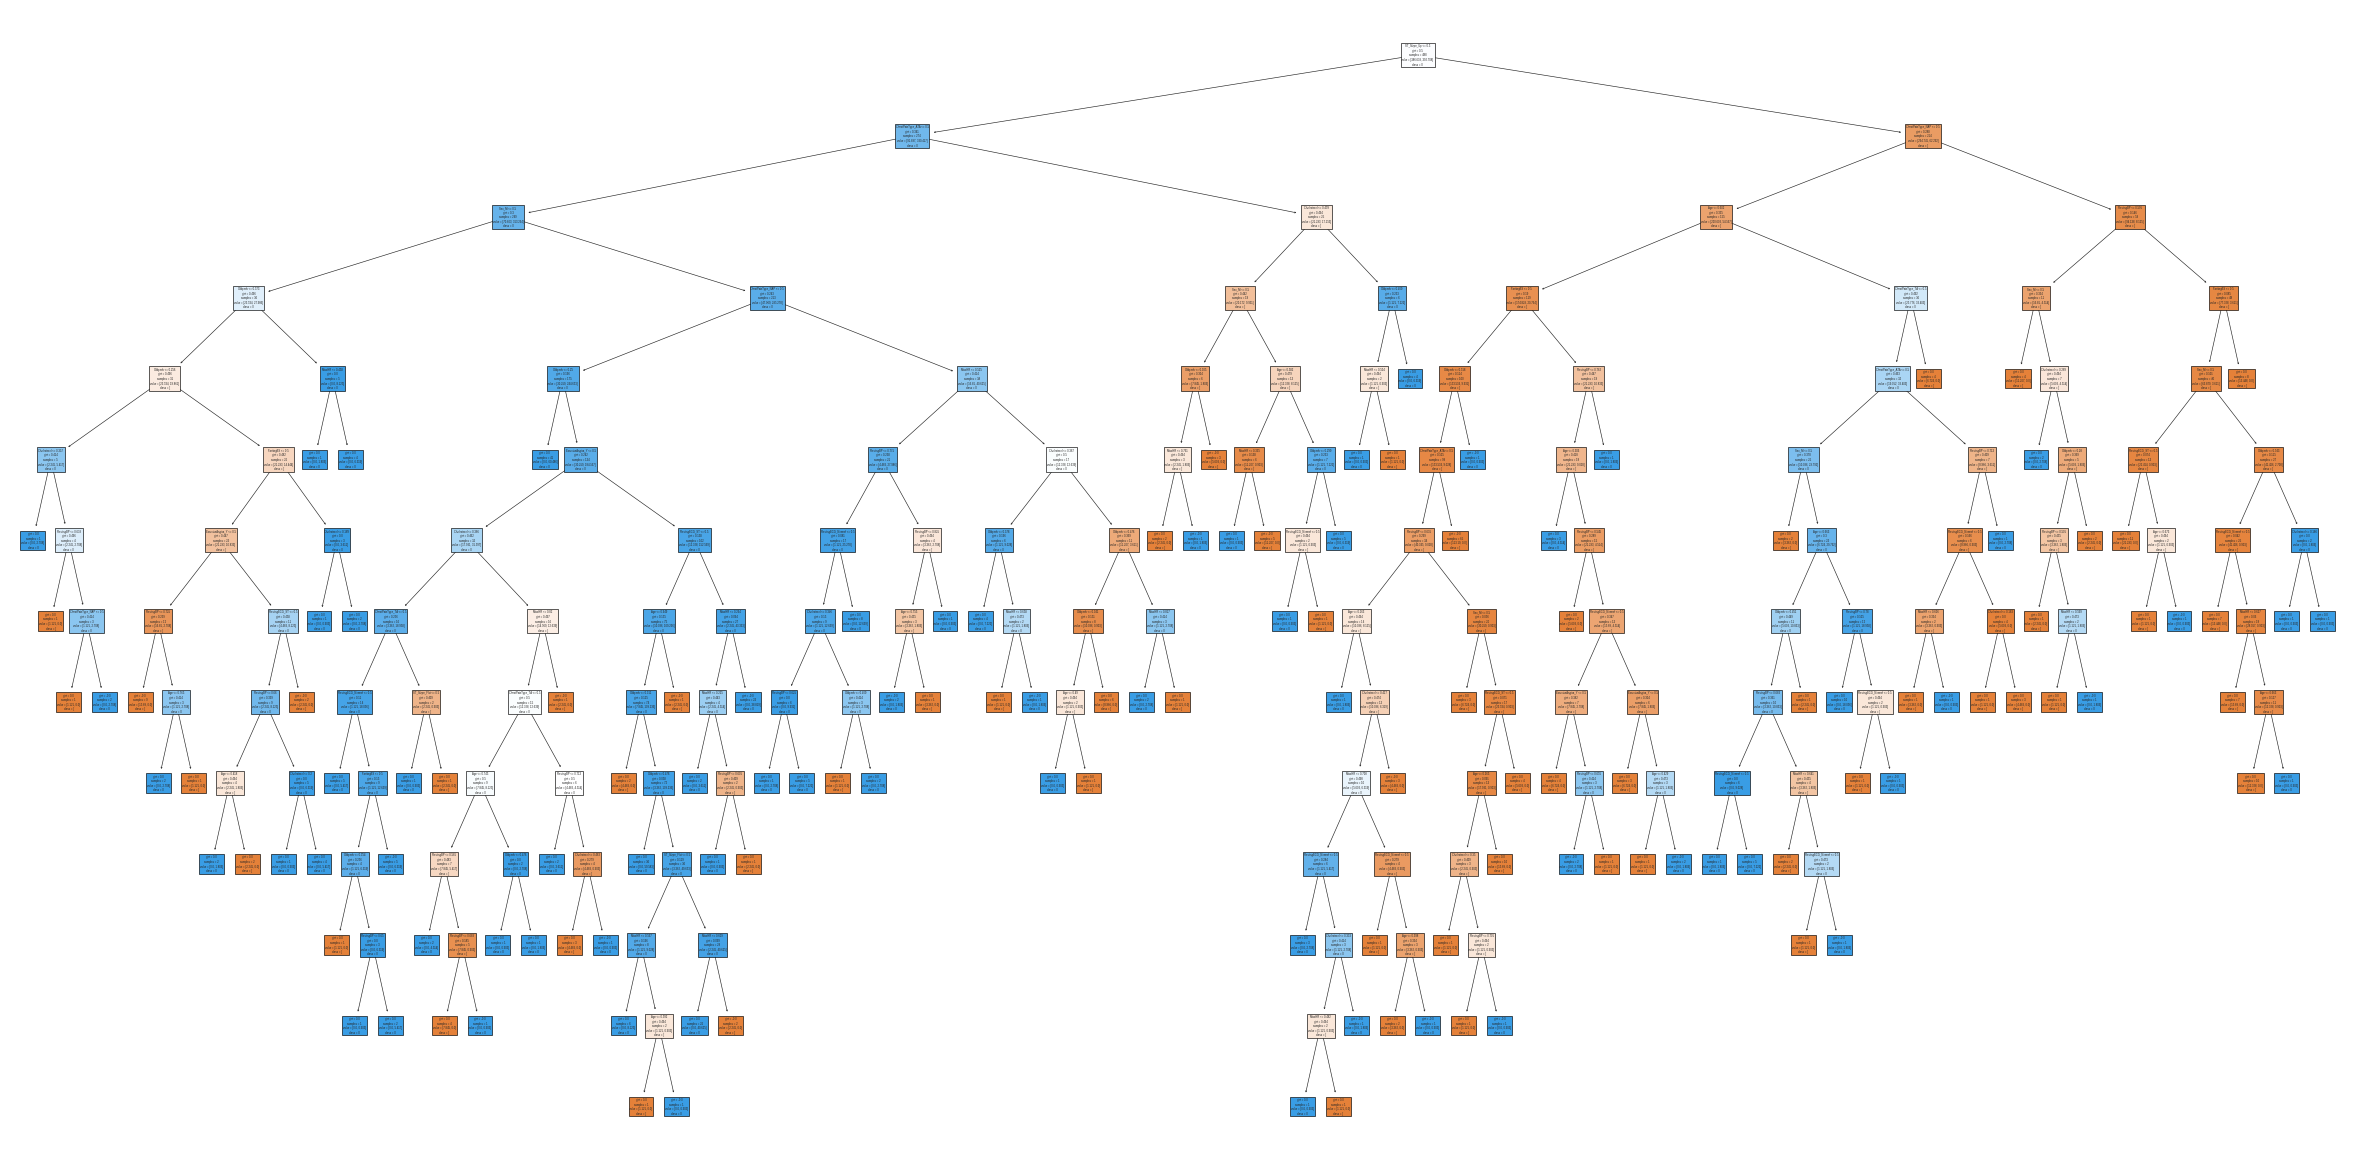

In [161]:
features = list(X.columns)
targets = str(df.HeartDisease.unique())

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=150)
plot_tree(RF_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True);

In [162]:
accuracy_scores

[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.883     0.841
Precision      0.881     0.846
Recall         0.912     0.868
f1             0.896     0.857

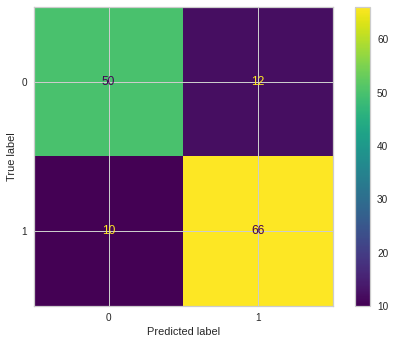

In [163]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [164]:
y_pred_proba = KNN_model.predict_proba(X_test_scaled)

In [165]:
pd.DataFrame(y_pred_proba)

0     1
0   0.000 1.000
1   0.200 0.800
2   0.200 0.800
3   0.800 0.200
4   0.400 0.600
..    ...   ...
133 0.800 0.200
134 1.000 0.000
135 0.600 0.400
136 0.000 1.000
137 0.800 0.200

[138 rows x 2 columns]

In [166]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [167]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
338       1     1    0.800    0.200
337       1     1    0.800    0.200
542       1     1    0.600    0.400
92        0     0    0.000    1.000
219       0     0    0.000    1.000
61        0     0    0.000    1.000
171       0     0    0.000    1.000
502       1     1    1.000    0.000
167       0     0    0.000    1.000
644       0     0    0.000    1.000

In [168]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.002       0.005          0.808           0.792        0.884    0.835
2      0.001       0.005          0.859           0.833        0.930    0.879
3      0.001       0.005          0.923           0.930        0.930    0.930
4      0.001       0.005          0.821           0.837        0.837    0.837
5      0.001       0.004          0.923           0.894        0.977    0.933
6      0.001       0.005          0.821           0.822        0.860    0.841
7      0.001       0.005          0.872           0.837        0.953    0.891
8      0.001       0.004          0.859           0.848        0.907    0.876
9      0.001       0.005          0.833           0.897        0.795    0.843
10     0.001       0.005          0.936           0.915        0.977    0.945

In [169]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy    0.865
test_precision   0.861
test_recall      0.905
test_f1          0.881
dtype: float64

In [170]:
test_error_rates = []


for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [171]:
test_error_rates

[0.1594202898550725,
 0.2246376811594203,
 0.14492753623188404,
 0.16666666666666663,
 0.1594202898550725,
 0.16666666666666663,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.14492753623188404,
 0.13043478260869568,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.1376811594202898,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898]

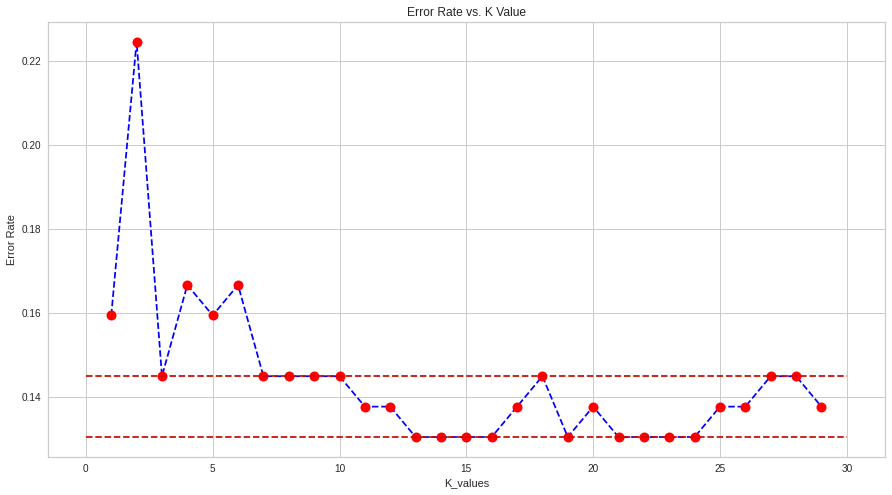

In [172]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--");

In [173]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [174]:
KNN_grid = KNeighborsClassifier()

In [175]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')

In [176]:
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [177]:
print(colored('\033[1mBest Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for KNN Model: {'n_neighbors': 26, 'p': 2, 'weights': 'distance'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for KNN Model: KNeighborsClassifier(n_neighbors=26, weights='distance')


WITH K=26
-------------------
[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.860     0.841
Precision      0.855     0.846
Recall         0.900     0.868
f1             0.877     0.857

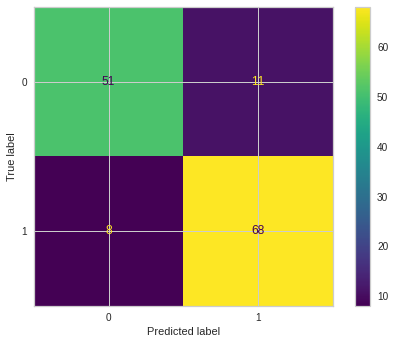

In [178]:
# NOW WITH K=26

KNN_model = KNeighborsClassifier(n_neighbors=26, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn26_f1 = f1_score(y_test, y_pred)
knn26_acc = accuracy_score(y_test, y_pred)
knn26_recall = recall_score(y_test, y_pred)
knn26_auc = roc_auc_score(y_test, y_pred)

print('WITH K=26')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=13
-------------------
[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.869     0.841
Precision      0.863     0.846
Recall         0.907     0.868
f1             0.885     0.857

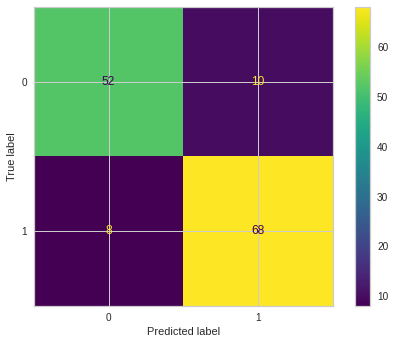

In [179]:
# NOW WITH K=13

KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn13_f1 = f1_score(y_test, y_pred)
knn13_acc = accuracy_score(y_test, y_pred)
knn13_recall = recall_score(y_test, y_pred)
knn13_auc = roc_auc_score(y_test, y_pred)

print('WITH K=13')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

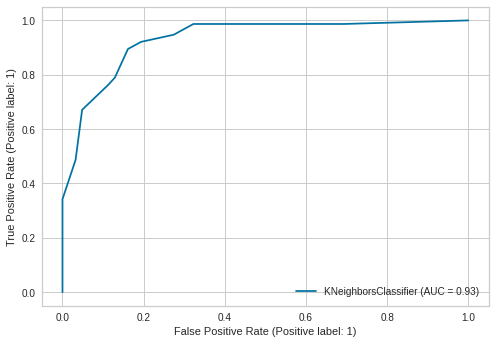

In [180]:
plot_roc_curve(KNN_model, X_test_scaled, y_test);

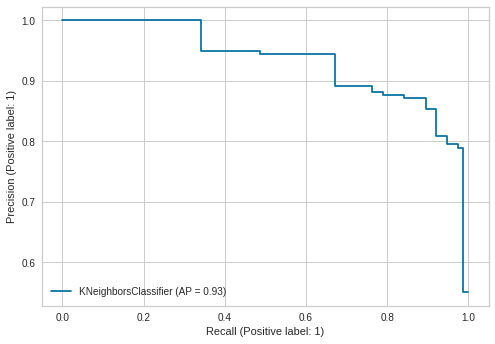

In [181]:
plot_precision_recall_curve(KNN_model, X_test_scaled, y_test);

In [182]:
accuracy_scores

<IPython.core.display.Javascript object>

[[56  6]
 [ 5 71]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.92      0.93      0.93        76

    accuracy                           0.92       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.92      0.92      0.92       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.940     0.920
Precision      0.937     0.922
Recall         0.956     0.934
f1             0.946     0.928

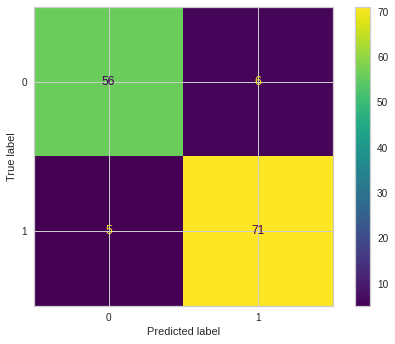

In [183]:
GB_model = GradientBoostingClassifier(random_state=42)
GB_model.fit(X_train_scaled, y_train)
y_pred = GB_model.predict(X_test_scaled)
y_train_pred = GB_model.predict(X_train_scaled)

gb_f1 = f1_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[320  28]
 [ 19 413]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       348
           1       0.94      0.96      0.95       432

    accuracy                           0.94       780
   macro avg       0.94      0.94      0.94       780
weighted avg       0.94      0.94      0.94       780

--------------------------------------------------------


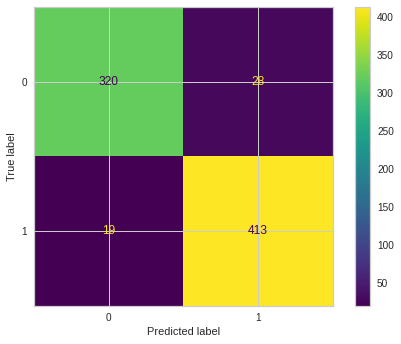

In [184]:
y_train_pred = GB_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_train_scaled, y_train);

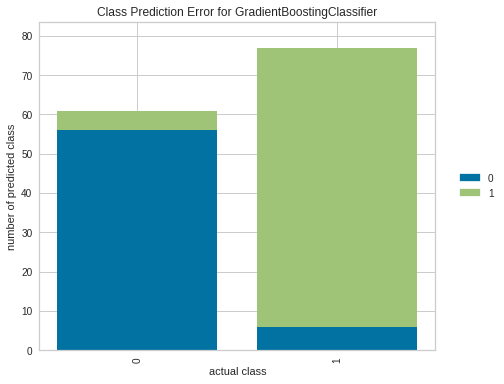

In [185]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(GB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [186]:
gb_xvalid_model = GradientBoostingClassifier(random_state=42)

gb_xvalid_model_scores = cross_validate(gb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
gb_xvalid_model_scores = pd.DataFrame(gb_xvalid_model_scores, index = range(1, 11))

gb_xvalid_model_scores

<IPython.core.display.Javascript object>

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.091       0.002          0.833                 0.832   
2      0.082       0.002          0.833                 0.835   
3      0.085       0.002          0.885                 0.888   
4      0.082       0.002          0.872                 0.870   
5      0.082       0.002          0.885                 0.883   
6      0.082       0.002          0.859                 0.867   
7      0.083       0.002          0.897                 0.899   
8      0.083       0.002          0.833                 0.832   
9      0.084       0.004          0.833                 0.833   
10     0.103       0.002          0.872                 0.869   

    test_recall_macro  test_f1_macro  
1               0.830          0.831  
2               0.828          0.830  
3               0.879          0.882  
4               0.870          0.870  
5               0.885          0.884  
6               0.851          0.855  
7               0.894          0.896  
8               0.830          0.831  
9               0.839          0.833  
10              0.873          0.870

In [187]:
gb_xvalid_model_scores.mean()

fit_time               0.086
score_time             0.002
test_accuracy          0.860
test_precision_macro   0.861
test_recall_macro      0.858
test_f1_macro          0.858
dtype: float64

In [188]:
GB_model.feature_importances_

array([0.04547774, 0.04765723, 0.1216169 , 0.02435517, 0.06266039,
       0.06187126, 0.04401044, 0.02469931, 0.03502063, 0.01117504,
       0.00841365, 0.00272764, 0.06939297, 0.02077538, 0.42014625])

In [189]:
GB_feature_imp = pd.DataFrame(index = X.columns, data = GB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
GB_feature_imp

Feature Importance
ST_Slope_Up                     0.420
Cholesterol                     0.122
ExerciseAngina_Y                0.069
MaxHR                           0.063
Oldpeak                         0.062
RestingBP                       0.048
Age                             0.045
Sex_M                           0.044
ChestPainType_NAP               0.035
ChestPainType_ATA               0.025
FastingBS                       0.024
ST_Slope_Flat                   0.021
ChestPainType_TA                0.011
RestingECG_Normal               0.008
RestingECG_ST                   0.003

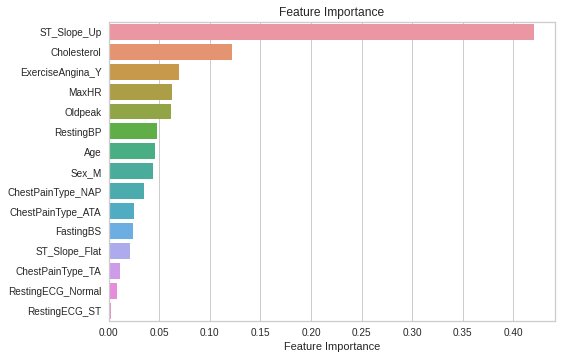

In [190]:
sns.barplot(x=GB_feature_imp["Feature Importance"], y=GB_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [191]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.867
Accuracy score (test): 0.862



<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.894
Accuracy score (test): 0.899



<IPython.core.display.Javascript object>

Learning rate:  0.15
Accuracy score (training): 0.903
Accuracy score (test): 0.913



<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.921
Accuracy score (test): 0.913



<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.940
Accuracy score (test): 0.920



<IPython.core.display.Javascript object>

Learning rate:  0.6
Accuracy score (training): 0.953
Accuracy score (test): 0.899



<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.969
Accuracy score (test): 0.884



<IPython.core.display.Javascript object>

Learning rate:  0.85
Accuracy score (training): 0.965
Accuracy score (test): 0.884



<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.969
Accuracy score (test): 0.812



In [192]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}  # 'max_depth':[3,4,5,6]

In [193]:
GB_grid_model = GradientBoostingClassifier(random_state=42)

GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=None, n_estim

In [194]:
print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 0.2, 'max_features': 2, 'n_estimators': 100, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(learning_rate=0.2, max_features=2, random_state=42,
                           subsample=1)


[[47 15]
 [ 8 68]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        62
           1       0.82      0.89      0.86        76

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.806     0.833
Precision      0.828     0.819
Recall         0.822     0.895
f1             0.825     0.855

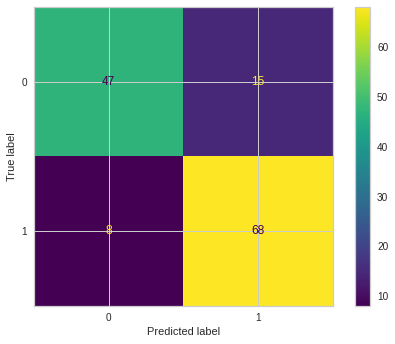

In [195]:
y_pred = GB_grid_model.predict(X_test_scaled)
y_train_pred = GB_grid_model.predict(X_train_scaled)

gb_grid_f1 = f1_score(y_test, y_pred)
gb_grid_acc = accuracy_score(y_test, y_pred)
gb_grid_recall = recall_score(y_test, y_pred)
gb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

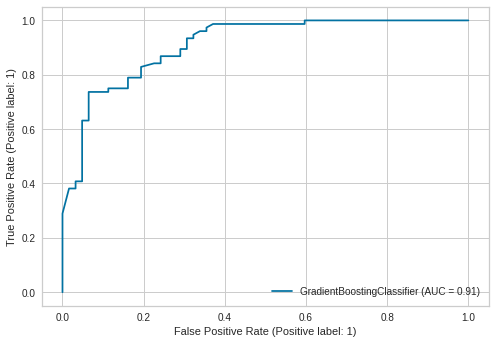

In [196]:
plot_roc_curve(GB_model, X_test, y_test);

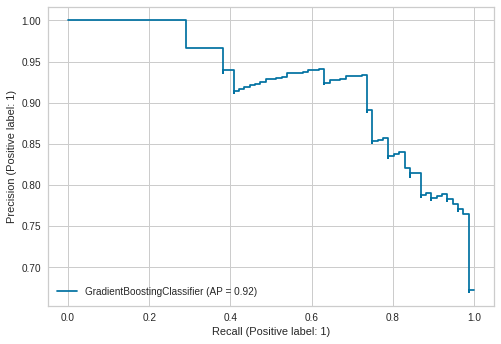

In [197]:
plot_precision_recall_curve(GB_model, X_test, y_test);

In [198]:
accuracy_scores

[[52 10]
 [ 7 69]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.879     0.877
Precision      0.889     0.873
Recall         0.894     0.908
f1             0.891     0.890

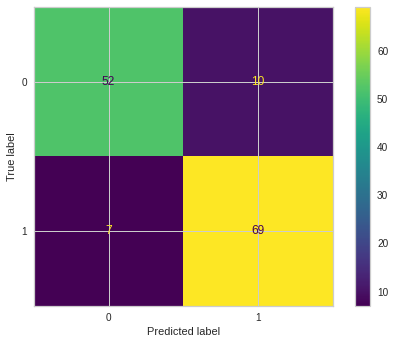

In [199]:
AB_model = AdaBoostClassifier(n_estimators=50, random_state=101)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
y_train_pred = AB_model.predict(X_train)

ab_f1 = f1_score(y_test, y_pred)
ab_acc = accuracy_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[300  48]
 [ 46 386]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       348
           1       0.89      0.89      0.89       432

    accuracy                           0.88       780
   macro avg       0.88      0.88      0.88       780
weighted avg       0.88      0.88      0.88       780

--------------------------------------------------------


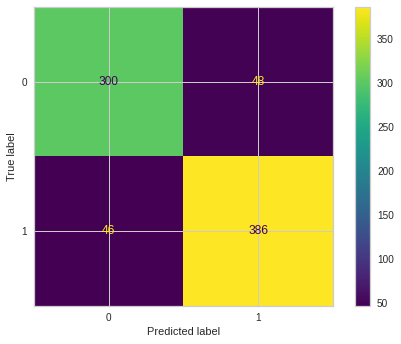

In [200]:
y_train_pred = AB_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

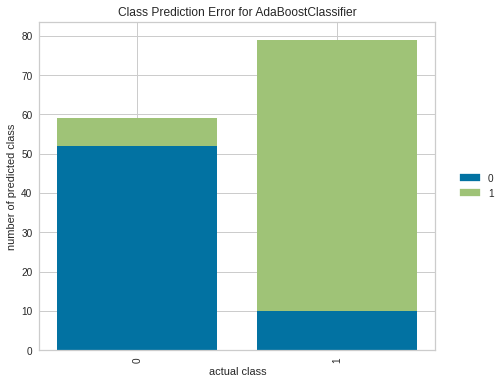

In [201]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(AB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [202]:
ab_xvalid_model = AdaBoostClassifier(n_estimators=50, random_state=101)

ab_xvalid_model_scores = cross_validate(ab_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
ab_xvalid_model_scores = pd.DataFrame(ab_xvalid_model_scores, index = range(1, 11))

ab_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.057       0.008          0.782           0.795        0.814    0.805
2      0.054       0.008          0.808           0.833        0.814    0.824
3      0.053       0.008          0.872           0.884        0.884    0.884
4      0.053       0.008          0.795           0.814        0.814    0.814
5      0.051       0.008          0.833           0.841        0.860    0.851
6      0.052       0.008          0.833           0.857        0.837    0.847
7      0.052       0.008          0.923           0.894        0.977    0.933
8      0.051       0.008          0.833           0.857        0.837    0.847
9      0.052       0.008          0.833           0.878        0.818    0.847
10     0.051       0.008          0.923           0.932        0.932    0.932

In [203]:
ab_xvalid_model_scores.mean()

fit_time         0.053
score_time       0.008
test_accuracy    0.844
test_precision   0.859
test_recall      0.859
test_f1          0.858
dtype: float64

In [204]:
AB_model = AdaBoostClassifier(n_estimators=3, random_state=42)
AB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [205]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

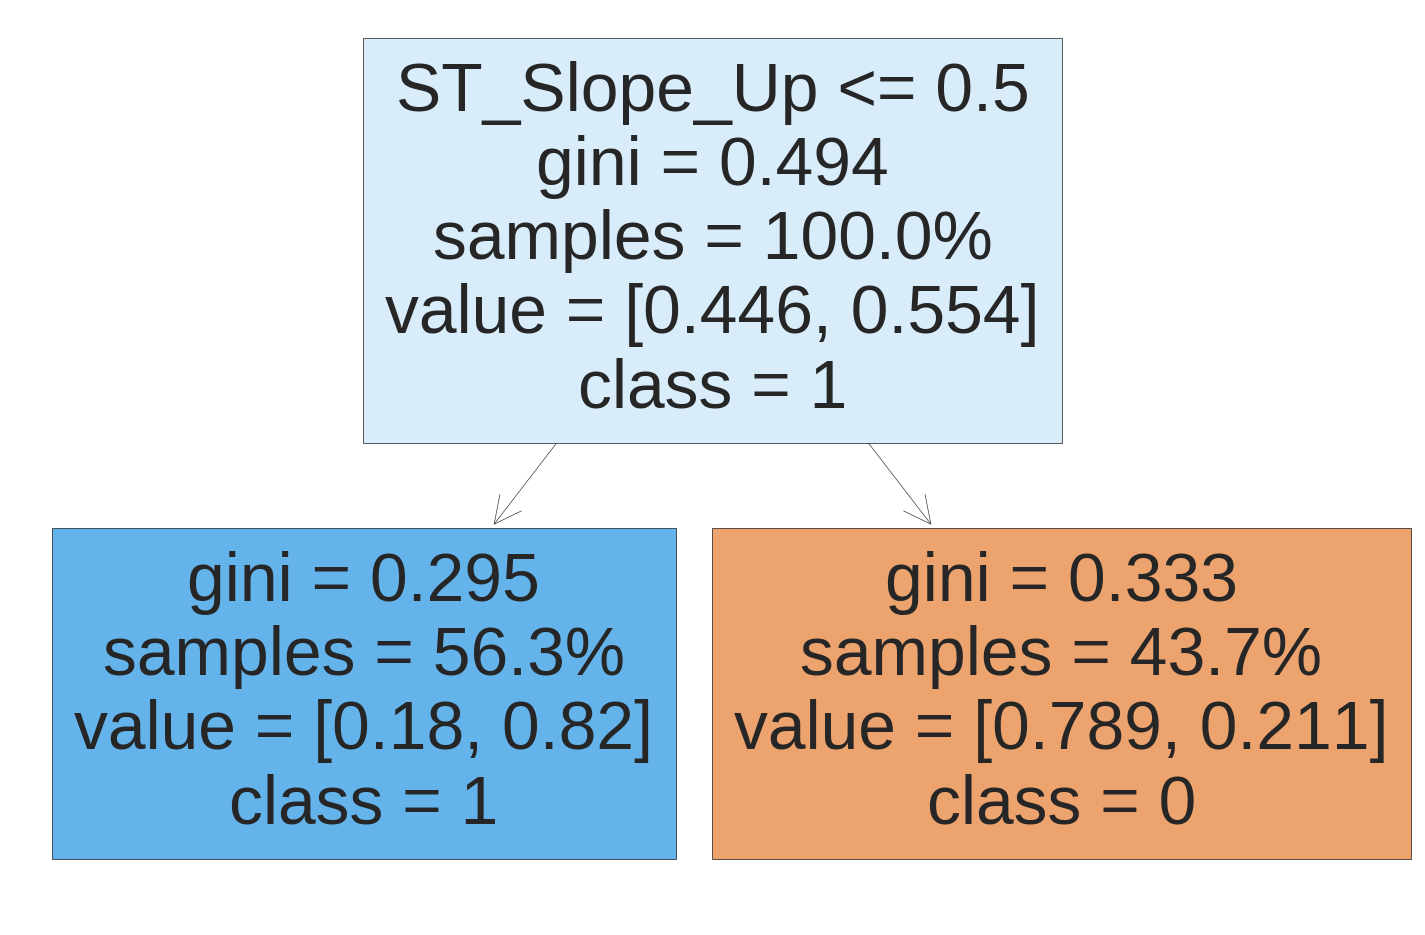

In [206]:
features = list(X.columns)
targets = df["HeartDisease"].astype("str")

plt.figure(figsize=(12, 8),dpi=150)
plot_tree(AB_model.estimators_[0], filled=True, feature_names=features, class_names=targets.unique(), proportion=True);

In [207]:
error_rates = []

for n in range(1, 100):
    
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    preds = AB_model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

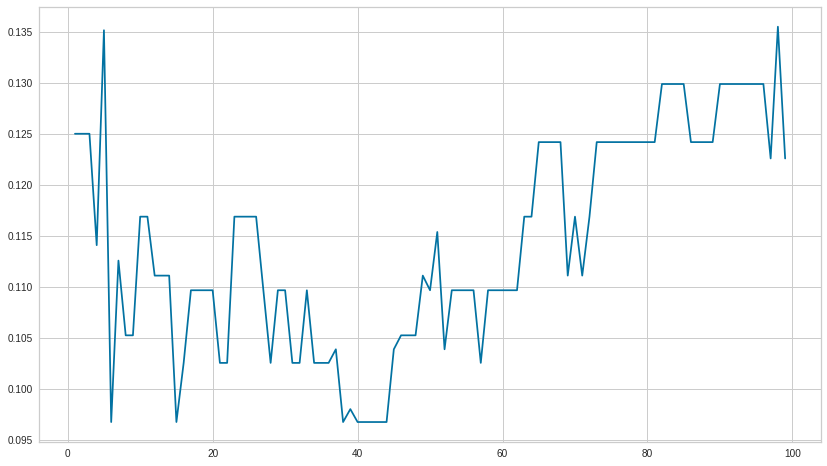

In [208]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 100), error_rates);

In [209]:
AB_model.feature_importances_

array([0.18181818, 0.14141414, 0.2020202 , 0.02020202, 0.14141414,
       0.13131313, 0.02020202, 0.02020202, 0.03030303, 0.02020202,
       0.        , 0.01010101, 0.02020202, 0.03030303, 0.03030303])

In [210]:
AB_feature_imp = pd.DataFrame(index = X.columns, data = AB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
AB_feature_imp

Feature Importance
Cholesterol                     0.202
Age                             0.182
RestingBP                       0.141
MaxHR                           0.141
Oldpeak                         0.131
ChestPainType_NAP               0.030
ST_Slope_Flat                   0.030
ST_Slope_Up                     0.030
FastingBS                       0.020
Sex_M                           0.020
ChestPainType_ATA               0.020
ChestPainType_TA                0.020
ExerciseAngina_Y                0.020
RestingECG_ST                   0.010
RestingECG_Normal               0.000

In [211]:
imp_feats = AB_feature_imp.sort_values("Feature Importance")

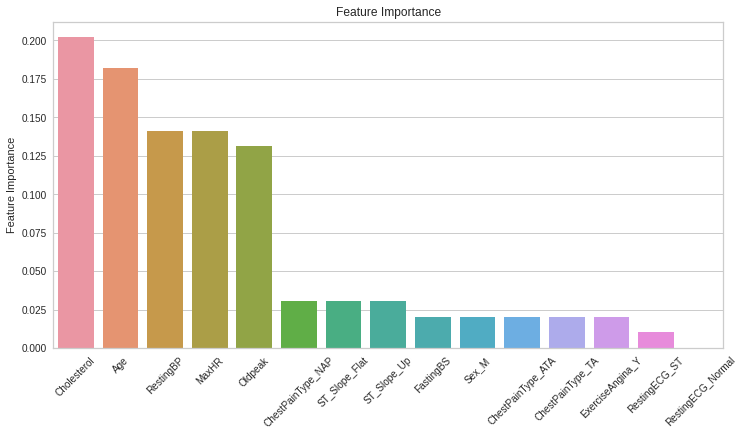

In [212]:
plt.figure(figsize=(12,6))

sns.barplot(y=AB_feature_imp["Feature Importance"], x=AB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [213]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    ab = AdaBoostClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    ab.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ab.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(ab.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.806
Accuracy score (test): 0.855

Learning rate:  0.1
Accuracy score (training): 0.817
Accuracy score (test): 0.855

Learning rate:  0.15
Accuracy score (training): 0.828
Accuracy score (test): 0.855

Learning rate:  0.25
Accuracy score (training): 0.862
Accuracy score (test): 0.884

Learning rate:  0.5
Accuracy score (training): 0.877
Accuracy score (test): 0.884

Learning rate:  0.6
Accuracy score (training): 0.883
Accuracy score (test): 0.884

Learning rate:  0.75
Accuracy score (training): 0.879
Accuracy score (test): 0.870

Learning rate:  0.85
Accuracy score (training): 0.873
Accuracy score (test): 0.870

Learning rate:  1
Accuracy score (training): 0.868
Accuracy score (test): 0.877



In [214]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [215]:
AB_grid_model = AdaBoostClassifier(random_state=42)
AB_grid_model = GridSearchCV(AB_grid_model, param_grid, cv=5, scoring= 'f1')

In [216]:
AB_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25,
                                           1.5],
                         'n_estimators': [15, 20, 100, 500]},
             scoring='f1')

In [217]:
print(colored('\033[1mBest Parameters of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for AdaBoosting Model: {'learning_rate': 0.5, 'n_estimators': 15}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for AdaBoosting Model: AdaBoostClassifier(learning_rate=0.5, n_estimators=15, random_state=42)


[[51 11]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.869     0.877
Precision      0.872     0.864
Recall         0.896     0.921
f1             0.884     0.892

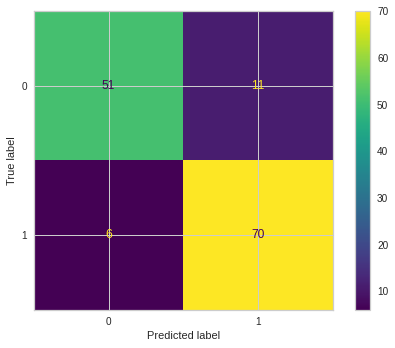

In [218]:
y_pred = AB_grid_model.predict(X_test)
y_train_pred = AB_grid_model.predict(X_train)

ab_grid_f1 = f1_score(y_test, y_pred)
ab_grid_acc = accuracy_score(y_test, y_pred)
ab_grid_recall = recall_score(y_test, y_pred)
ab_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_grid_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[291  57]
 [ 45 387]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       348
           1       0.87      0.90      0.88       432

    accuracy                           0.87       780
   macro avg       0.87      0.87      0.87       780
weighted avg       0.87      0.87      0.87       780

--------------------------------------------------------


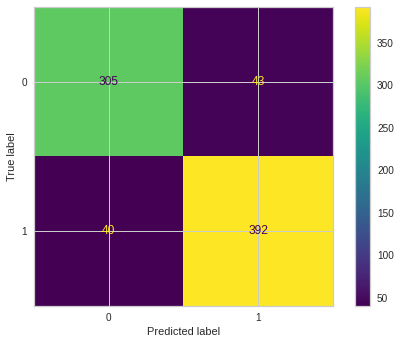

In [219]:
y_train_pred = AB_grid_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

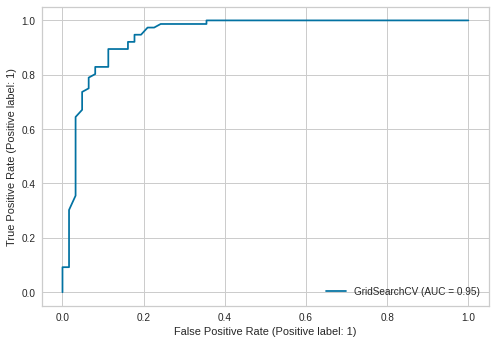

In [220]:
plot_roc_curve(AB_grid_model, X_test, y_test);

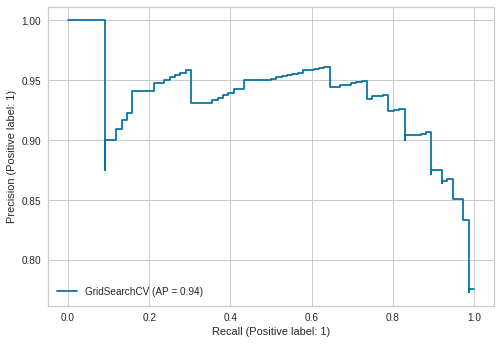

In [221]:
plot_precision_recall_curve(AB_grid_model, X_test, y_test);

In [222]:
accuracy_scores

[[55  7]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.91      0.88      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.884
Precision      1.000     0.905
Recall         1.000     0.882
f1             1.000     0.893

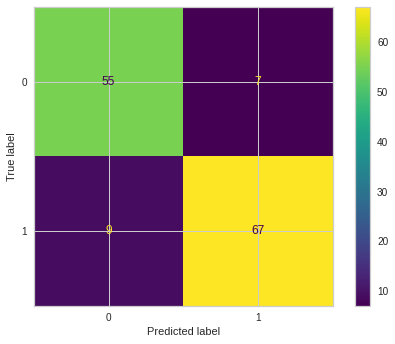

In [223]:
XGB_model = XGBClassifier(random_state=101)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_train_pred = XGB_model.predict(X_train_scaled)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

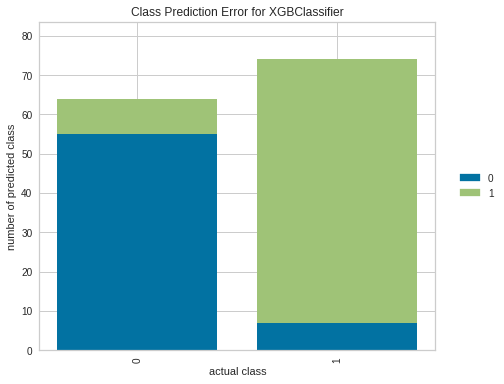

In [224]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(XGB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [225]:
xgb_xvalid_model = XGBClassifier(random_state=101)

xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
xgb_xvalid_model_scores = pd.DataFrame(xgb_xvalid_model_scores, index = range(1, 11))

xgb_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.112       0.004          0.821           0.837        0.837    0.837
2      0.040       0.004          0.756           0.773        0.791    0.782
3      0.040       0.004          0.897           0.889        0.930    0.909
4      0.039       0.004          0.846           0.860        0.860    0.860
5      0.045       0.004          0.846           0.878        0.837    0.857
6      0.040       0.004          0.885           0.854        0.953    0.901
7      0.040       0.004          0.846           0.816        0.930    0.870
8      0.038       0.004          0.821           0.837        0.837    0.837
9      0.040       0.004          0.808           0.872        0.773    0.819
10     0.052       0.004          0.897           0.891        0.932    0.911

In [226]:
xgb_xvalid_model_scores.mean()

fit_time         0.049
score_time       0.004
test_accuracy    0.842
test_precision   0.851
test_recall      0.868
test_f1          0.858
dtype: float64

In [227]:
XGB_model.feature_importances_ 

array([0.01034657, 0.00827132, 0.01459766, 0.02276584, 0.01219854,
       0.01343196, 0.020674  , 0.01842575, 0.02250193, 0.01536593,
       0.01140481, 0.01122345, 0.03192241, 0.01766846, 0.76920134],
      dtype=float32)

In [228]:
feats = pd.DataFrame(index=X.columns, data=XGB_model.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

Feature Importance
ST_Slope_Up                     0.769
ExerciseAngina_Y                0.032
FastingBS                       0.023
ChestPainType_NAP               0.023
Sex_M                           0.021
ChestPainType_ATA               0.018
ST_Slope_Flat                   0.018
ChestPainType_TA                0.015
Cholesterol                     0.015
Oldpeak                         0.013
MaxHR                           0.012
RestingECG_Normal               0.011
RestingECG_ST                   0.011
Age                             0.010
RestingBP                       0.008

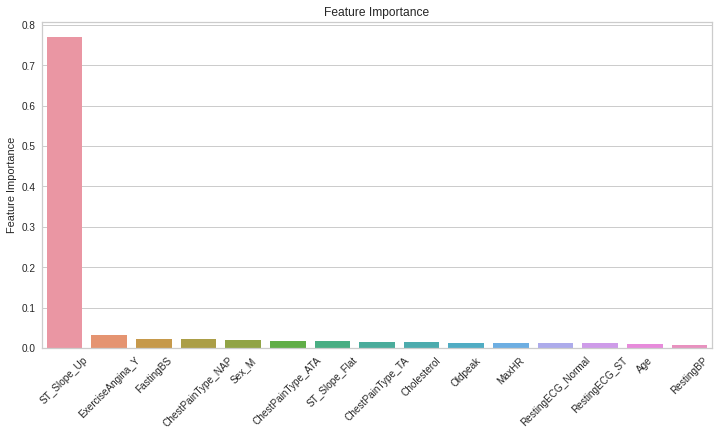

In [229]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [230]:
X2 = X.drop(columns = ["ST_Slope_Up"]) 

In [231]:
X2.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

[[55  7]
 [ 9 67]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.91      0.88      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

[[55  7]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.91      0.88      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


train_set  test_set
Accuracy       1.000     0.884
Precision      1.000     0.905
Recall         1.000     0.882
f1             1.000     0.893

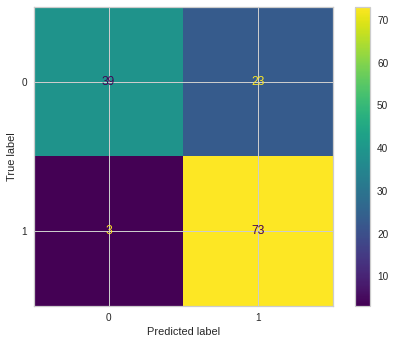

In [232]:
operations = [("scaler", MinMaxScaler()), ("xgb", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)
XGB_pipe_model.get_params()
XGB_pipe_model.fit(X_train, y_train)

y_pred = XGB_pipe_model.predict(X_test)
y_train_pred = XGB_pipe_model.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

xgb_pipe_f1 = f1_score(y_test, y_pred)
xgb_pipe_acc = accuracy_score(y_test, y_pred)
xgb_pipe_recall = recall_score(y_test, y_pred)
xgb_pipe_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_pipe_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [233]:
pipe_scores = cross_validate(XGB_pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

df_pipe_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.115       0.005          0.821           0.837        0.837    0.837
2      0.177       0.005          0.756           0.773        0.791    0.782
3      0.045       0.005          0.897           0.889        0.930    0.909
4      0.102       0.005          0.846           0.860        0.860    0.860
5      0.087       0.005          0.846           0.878        0.837    0.857
6      0.067       0.005          0.885           0.854        0.953    0.901
7      0.044       0.005          0.846           0.816        0.930    0.870
8      0.044       0.005          0.821           0.837        0.837    0.837
9      0.044       0.005          0.808           0.872        0.773    0.819
10     0.045       0.005          0.897           0.891        0.932    0.911

In [234]:
df_pipe_scores.mean()[2:]

test_accuracy    0.842
test_precision   0.851
test_recall      0.868
test_f1          0.858
dtype: float64

train_set  test_set
Accuracy       1.000     0.884
Precision      1.000     0.905
Recall         1.000     0.882
f1             1.000     0.893

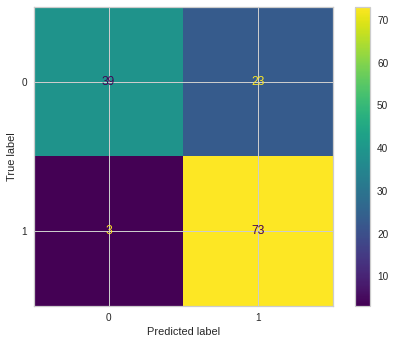

In [235]:
plot_confusion_matrix(XGB_pipe_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [236]:
# evaluate the pipeline

# from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(XGB_pipe_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %85.949, Results Standard Deviation : 3.57


In [237]:
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.859 (0.036)


In [238]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [239]:
XGB_grid_model = XGBClassifier(random_state=42)
XGB_grid_model = GridSearchCV(XGB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [240]:
XGB_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [241]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for RF Model: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ..

[[56  6]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        62
           1       0.92      0.92      0.92        76

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138

--------------------------------------------------------


train_set  test_set
Accuracy       0.929     0.913
Precision      0.926     0.921
Recall         0.949     0.921
f1             0.937     0.921

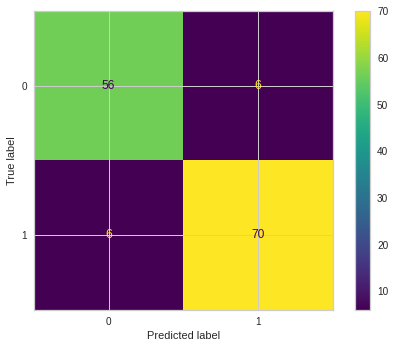

In [242]:
y_pred = XGB_grid_model.predict(X_test_scaled)
y_train_pred = XGB_grid_model.predict(X_train_scaled)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

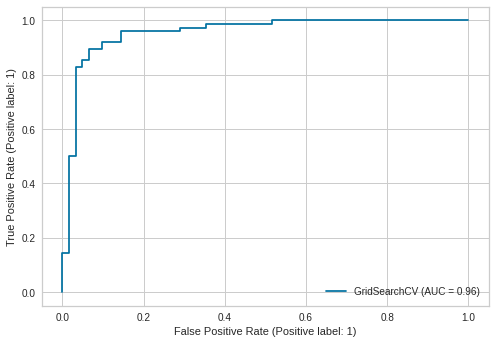

In [243]:
plot_roc_curve(XGB_grid_model, X_test_scaled, y_test);

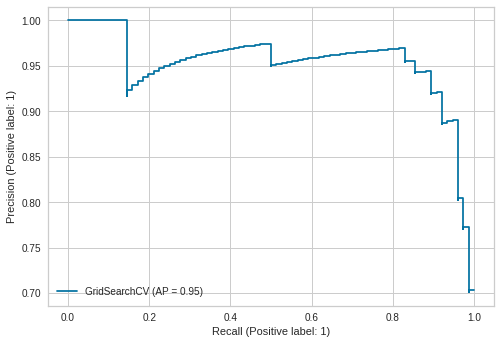

In [244]:
plot_precision_recall_curve(XGB_grid_model, X_test_scaled, y_test);

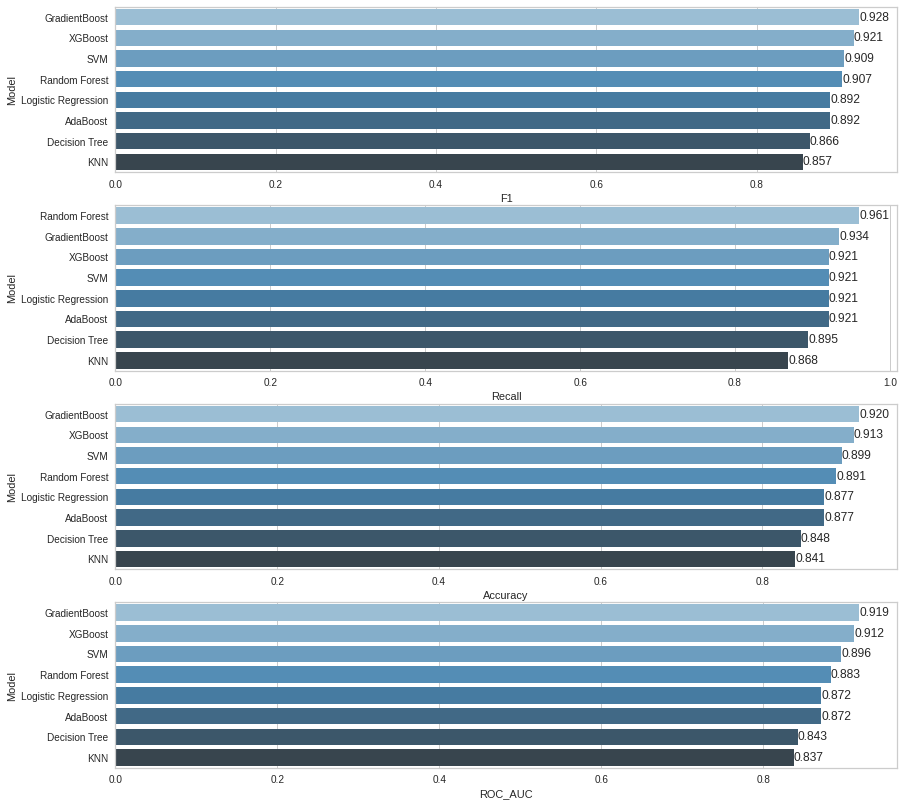

In [245]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "GradientBoost", "XGBoost"],
                        "F1": [log_f1, svm_grid_f1, knn_f1, dt_grid_f1, rf_grid_f1, ab_grid_f1, gb_f1, xgb_grid_f1],
                        "Recall": [log_recall, svm_grid_recall, knn_recall, dt_grid_recall, rf_grid_recall, ab_grid_recall, gb_recall, xgb_grid_recall],
                        "Accuracy": [log_acc, svm_grid_acc, knn_acc, dt_grid_acc, rf_grid_acc, ab_grid_acc, gb_acc, xgb_grid_acc],
                        "ROC_AUC": [log_auc, svm_grid_auc, knn_auc, dt_grid_auc, rf_grid_auc, ab_grid_auc, gb_auc, xgb_grid_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

In [2]:
# Prepare the data for the NN Model
# all data must be normalized

import numpy as np

datos = df0.copy()

datos['Age'] = (datos['Age'] - datos['Age'].min()) / (datos['Age'].max() - datos['Age'].min())
datos['Sex'] = datos['Sex'].replace({'F':1.0, 'M':0.0})
datos['ChestPainType'] = datos['ChestPainType'].replace({'ASY':0.0, 'ATA':0.333, 'NAP': 0.667, 'TA': 1.0}) 
datos['RestingBP'] = (datos['RestingBP'] - datos['RestingBP'].min()) / (datos['RestingBP'].max() - datos['RestingBP'].min())
datos['Cholesterol'] = (datos['Cholesterol'] - datos['Cholesterol'].min()) / (datos['Cholesterol'].max() - datos['Cholesterol'].min())
datos['RestingECG'] = datos['RestingECG'].replace({'LVH':0.0, 'Normal':0.5, 'ST': 1.0}) 
datos['MaxHR'] = (datos['MaxHR'] - datos['MaxHR'].min()) / (datos['MaxHR'].max() - datos['MaxHR'].min())
datos['ExerciseAngina'] = datos['ExerciseAngina'].replace({'N':0.0, 'Y':1.0})
datos['Oldpeak'] = (datos['Oldpeak'] - datos['Oldpeak'].min()) / (datos['Oldpeak'].max() - datos['Oldpeak'].min())
datos['ST_Slope'] = datos['ST_Slope'].replace({'Down':0.0, 'Flat':0.5, 'Up': 1.0})

outputs = np.array(datos['HeartDisease'])
inputs = np.array(datos.drop(['HeartDisease'], axis=1))


inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)


<IPython.core.display.Javascript object>

In [26]:
import sklearn as sk
import sklearn.neural_network as sknn

def run_nn(inputs_train, inputs_test, outputs_train, outputs_test, h_layers, verbose=False):
    # Create the model
    model = sknn.MLPClassifier(
        hidden_layer_sizes=h_layers, 
        max_iter=5000, 
        alpha=0.0001, 
        solver='sgd', 
        learning_rate='adaptive',
        n_iter_no_change=500,
        verbose=verbose, 
        tol=0.000000001, 
        random_state=1
    )
    # model = sknn.MLPRegressor(solver='sgd', batch_size='auto', tol=0.0005, learning_rate_init=0.002, hidden_layer_sizes=h_layers, verbose=verbose)
    # Train the model
    model.fit(inputs_train, outputs_train)
    # Predict the test set
    
    acc = 0
    true_true = 0
    true_false = 0
    false_true = 0
    false_false = 0
    
    for i in range(0, len(inputs_test)):
        pre = round(model.predict(inputs_test[i].reshape(1, -1))[0], 0)
        true_true = true_true + (pre == outputs_test[i] and outputs_test[i] == 1)
        true_false = true_false + (pre == outputs_test[i] and outputs_test[i] == 0)
        false_true = false_true + (pre != outputs_test[i] and outputs_test[i] == 1)
        false_false = false_false + (pre != outputs_test[i] and outputs_test[i] == 0)
        acc = acc + (pre == outputs_test[i])
        success = "#" if pre == outputs_test[i] else "."
        if verbose:
            print(success, end="")

    acc = acc / len(inputs_test)
    precision = true_true / (true_true + false_true)
    recall = true_true / (true_true + false_false)
    f1 = 2 * (precision * recall) / (precision + recall)
    # print("\nAccuracy:", acc)
    return {'acc': acc, 'precision': precision, 'recall': recall, 'f1': f1}



In [30]:
import itertools

max_nhl = 2     # max number of hidden layers
neurons = [10, 20, 40, 70]
res = {}
m = {'acc': 0, 'precision': 0, 'recall': 0, 'f1': 0}

def max(a, b):
    a['acc'] = b['acc'] if b['acc'] > a['acc'] else a['acc']
    a['precision'] = b['precision'] if b['precision'] > a['precision'] else a['precision']
    a['recall'] = b['recall'] if b['recall'] > a['recall'] else a['recall']
    a['f1'] = b['f1'] if b['f1'] > a['f1'] else a['f1'] 

for nhl in range(1, max_nhl+1):
    for subset in itertools.product(neurons, repeat=nhl):
        print('Procsessing:', subset, end=" ")
        metricas = run_nn(inputs_train, inputs_test, outputs_train, outputs_test, subset, verbose=False)
        max(m, metricas)
        res[subset] = metricas
        print('Acc: %.3f, Precision: %.3f, Recall: %.3f, F1: %.3f' % (metricas['acc'], metricas['precision'], metricas['recall'], metricas['f1']), end=" ")
        print('Max: Acc: %.3f, Precision: %.3f, Recall: %.3f, F1: %.3f' % (m['acc'], m['precision'], m['recall'], m['f1']))


print('res:', res)
print('m:', m)


Procsessing: (10,) Acc: 0.891, Precision: 0.907, Recall: 0.907, F1: 0.907 Max: Acc: 0.891, Precision: 0.907, Recall: 0.907, F1: 0.907
Procsessing: (20,) Acc: 0.772, Precision: 0.757, Recall: 0.835, F1: 0.794 Max: Acc: 0.891, Precision: 0.907, Recall: 0.907, F1: 0.907
Procsessing: (40,) Acc: 0.821, Precision: 0.748, Recall: 0.930, F1: 0.829 Max: Acc: 0.891, Precision: 0.907, Recall: 0.930, F1: 0.907
Procsessing: (70,) Acc: 0.815, Precision: 0.794, Recall: 0.876, F1: 0.833 Max: Acc: 0.891, Precision: 0.907, Recall: 0.930, F1: 0.907
Procsessing: (10, 10) Acc: 0.804, Precision: 0.794, Recall: 0.859, F1: 0.825 Max: Acc: 0.891, Precision: 0.907, Recall: 0.930, F1: 0.907
Procsessing: (10, 20) Acc: 0.799, Precision: 0.794, Recall: 0.850, F1: 0.821 Max: Acc: 0.891, Precision: 0.907, Recall: 0.930, F1: 0.907
Procsessing: (10, 40) Acc: 0.739, Precision: 0.692, Recall: 0.831, F1: 0.755 Max: Acc: 0.891, Precision: 0.907, Recall: 0.930, F1: 0.907
Procsessing: (10, 70) Acc: 0.810, Precision: 0.794, R

In [24]:
acc = run_nn(inputs_train, inputs_test, outputs_train, outputs_test, (10), verbose=False)
acc

0.8913043478260869

In [389]:

with open('perm_4L_20-80.csv', 'w') as csvfile:
   keys = res.keys()
   for key in keys:
      csvfile.write(str(key) + ',' + str(res[key]) + '\n')
   

In [350]:
lr = 0.002         # learning rate
nn = [0, 100 ,1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sknn.MLPRegressor(
        solver='sgd', 
        batch_size='auto',
        tol=0.0005,
        learning_rate_init=lr, 
        hidden_layer_sizes=tuple(nn[1:]),
        verbose=True,
        n_iter_no_change=100,
        max_iter=1000)


# Y lo entrenamos con nuestro datos.
clf.fit(inputs_train, outputs_train)

acc = 0
for i in range(0, len(inputs_test)):
    pre = round(clf.predict(inputs_test[i].reshape(1, -1))[0], 0)
    success = "#" if pre == outputs_test[i] else "."
    acc = acc + 1 if pre == outputs_test[i] else acc
    print(success, end="")

acc = acc / len(inputs_test)
print("\nAccuracy:", acc)

Iteration 1, loss = 0.80730196
Iteration 2, loss = 0.75472375
Iteration 3, loss = 0.69083898
Iteration 4, loss = 0.62383547
Iteration 5, loss = 0.55671062
Iteration 6, loss = 0.49349777
Iteration 7, loss = 0.43637862
Iteration 8, loss = 0.38588635
Iteration 9, loss = 0.34153471
Iteration 10, loss = 0.30432051
Iteration 11, loss = 0.27307572
Iteration 12, loss = 0.24667224
Iteration 13, loss = 0.22446674
Iteration 14, loss = 0.20631259
Iteration 15, loss = 0.19130969
Iteration 16, loss = 0.17881450
Iteration 17, loss = 0.16868430
Iteration 18, loss = 0.16047879
Iteration 19, loss = 0.15347133
Iteration 20, loss = 0.14818773
Iteration 21, loss = 0.14361142
Iteration 22, loss = 0.13991024
Iteration 23, loss = 0.13709056
Iteration 24, loss = 0.13457522
Iteration 25, loss = 0.13255374
Iteration 26, loss = 0.13097673
Iteration 27, loss = 0.12969475
Iteration 28, loss = 0.12855490
Iteration 29, loss = 0.12767762
Iteration 30, loss = 0.12704069
Iteration 31, loss = 0.12646532
Iteration 32, los